In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
folder = '/content/gdrive/My Drive/Colab Notebooks'

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pylab
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Data Visualazation/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xlsx')
data = pd.DataFrame(df)
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [ ]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [ ]:
##Xem kích thước bộ dữ liệu
print(f'Kích thước bộ dữ liệu: {df.shape[0]} dòng, {df.shape[1]} cột')

Kích thước bộ dữ liệu: 1200 dòng, 28 cột


In [ ]:
##thống kê mô tả
df.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [ ]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [ ]:
# Đọc dữ liệu từ tệp vào một DataFrame
data = pd.DataFrame(df)

# Lấy danh sách các cột và kiểm tra kiểu dữ liệu của từng cột
columns = data.columns
for col in columns:
    column_type = data[col].dtype
    if column_type == 'object':  # Kiểm tra nếu cột chứa dữ liệu phân loại (kiểu 'object')
        unique_values = data[col].unique()  # Lấy tất cả các giá trị duy nhất trong cột
        print(f"Cột '{col}' có các giá trị phân loại sau:")
        print(unique_values)


Cột 'EmpNumber' có các giá trị phân loại sau:
['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Cột 'Gender' có các giá trị phân loại sau:
['Male' 'Female']
Cột 'EducationBackground' có các giá trị phân loại sau:
['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
Cột 'MaritalStatus' có các giá trị phân loại sau:
['Single' 'Married' 'Divorced']
Cột 'EmpDepartment' có các giá trị phân loại sau:
['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
Cột 'EmpJobRole' có các giá trị phân loại sau:
['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
Cột 'BusinessTravelFrequency' có các g

In [ ]:
# In ra tổng số thuộc tính của bộ dữ liệu
num_attributes = data.shape[1]  # Lấy số cột (số thuộc tính)
print(f"Tổng số thuộc tính: {num_attributes}")

Tổng số thuộc tính: 28


In [ ]:
del data['EmpNumber']

#Data Cleaning

##kiểm tra missing value

In [ ]:
##kiểm tra missing value
data.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

##kiểm tra dữ liệu bị trùng

In [ ]:
data.duplicated().sum()

NameError: name 'data' is not defined

##Kiểm tra outliers và dùng phương pháp IQR để xử lí outliers

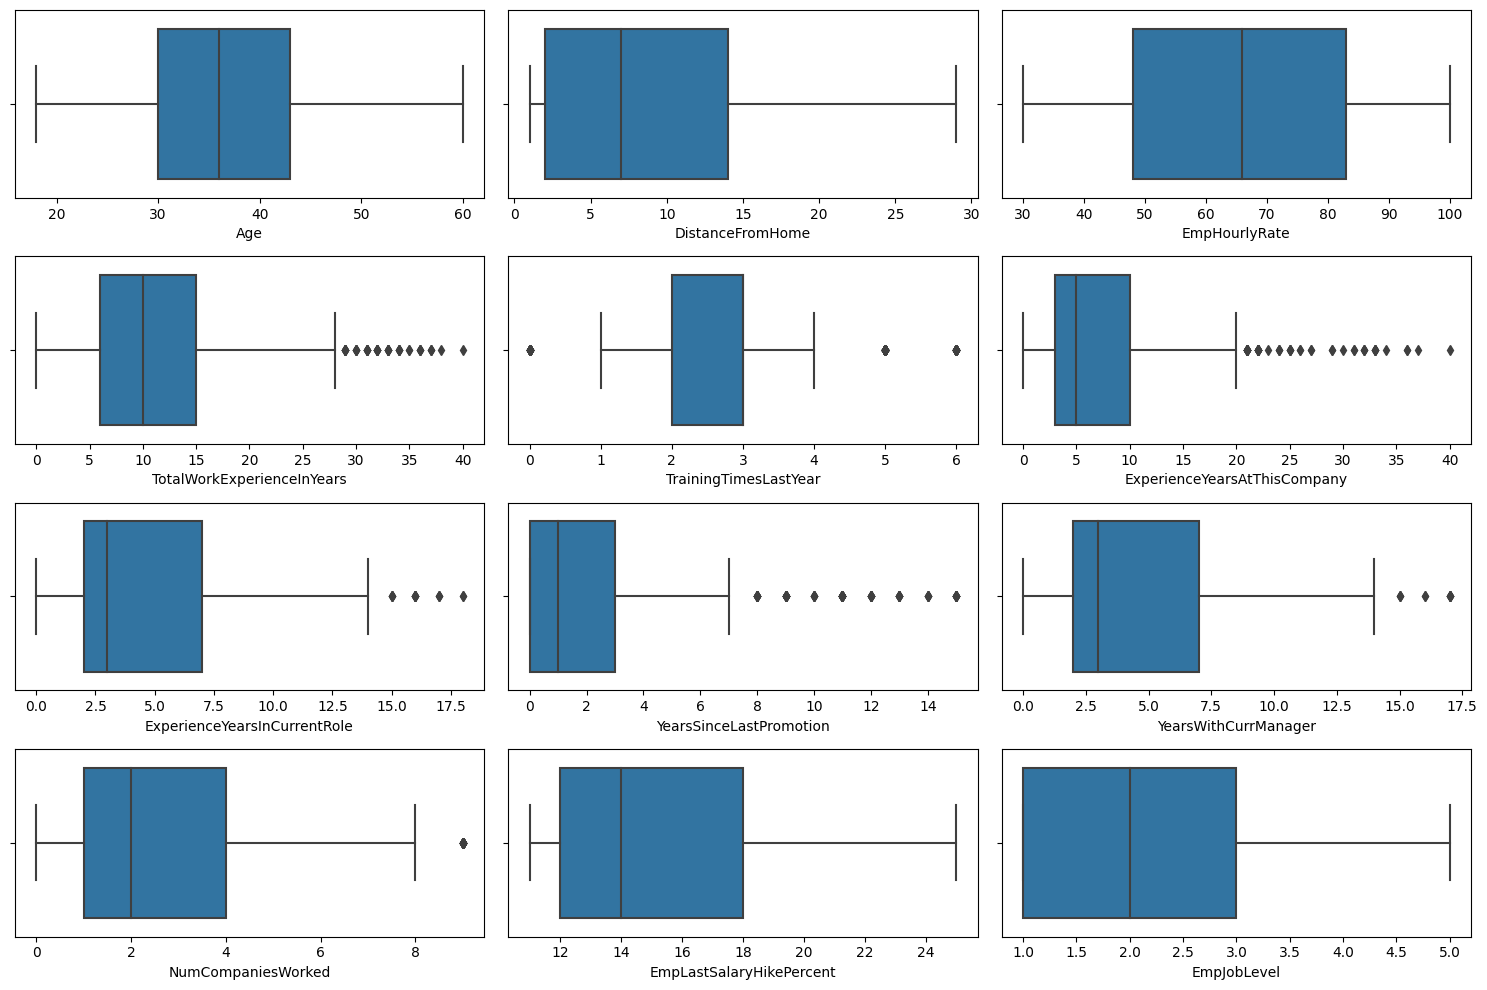

In [ ]:
out = data[['Age','DistanceFromHome','EmpHourlyRate','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent','EmpJobLevel']]

plotnumber = 1
plt.figure(figsize=(15, 10))
for column in out.columns:
    if plotnumber <= 12:
          plt.subplot(4, 3, plotnumber)
          sns.boxplot(data=out, x=column)
          plt.xlabel(column, fontsize=10)  # Thay đổi cỡ chữ tại đây
          plotnumber += 1
plt.tight_layout()
plt.show()

### Total Work Experience in year

In [ ]:
# Tính Q1 VÀ Q3 và iqr (tứ phân vị)
Q3, Q1 = np.percentile(data['TotalWorkExperienceInYears'], [75 ,25])
iqr = Q3-Q1
print(F'IQR = {iqr}\nQ1={Q1}\nQ3={Q3}')

# tính maximum và minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR = 9.0
Q1=6.0
Q3=15.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [ ]:
##kiểm tra outliner
print(f"số outliers là: {data.loc[(data['TotalWorkExperienceInYears'] > max_limit) | (data['TotalWorkExperienceInYears'] < min_limit)].shape[0]}")

số outliers là: 51


In [ ]:
# Impute outlier (Cho outliner = median)
data.loc[data['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()
data.loc[data['TotalWorkExperienceInYears'] < min_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()

In [ ]:
# Kiểm tra lại
print(f"số outliers là: {data.loc[(data['TotalWorkExperienceInYears'] > max_limit)|(data['TotalWorkExperienceInYears'] < min_limit)].shape[0]}")

số outliers là: 0


### Training Times Last Year

In [ ]:
# Tính Q1 VÀ Q3 và iqr
Q3, Q1 = np.percentile(data['TrainingTimesLastYear'], [75 ,25])
iqr = Q3-Q1
print(F'IQR = {iqr}\nQ1={Q1}\nQ3={Q3}')

# tính maximum và minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR = 1.0
Q1=2.0
Q3=3.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [ ]:
##kiểm tra outliner
data.loc[(data['TrainingTimesLastYear'] > max_limit) | (data['TrainingTimesLastYear'] < min_limit)]
print(f"số outliers là: {data.loc[(data['TrainingTimesLastYear'] > max_limit) | (data['TrainingTimesLastYear'] < min_limit)].shape[0]}")

số outliers là: 188


In [ ]:
# Impute outlier in max & minmum limit
data.loc[data['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()


In [ ]:
# Kiểm tra lại
print(f"số outliers là: {data.loc[(data['TrainingTimesLastYear'] > max_limit) | (data['TrainingTimesLastYear'] < min_limit)].shape[0]}")

số outliers là: 0


### Exprience years At This Company

In [ ]:
# Tính Q1 VÀ Q3 và iqr
Q3, Q1 = np.percentile(data['ExperienceYearsAtThisCompany'], [75 ,25])
iqr = Q3-Q1
print(F'IQR = {iqr}\nQ1={Q1}\nQ3={Q3}')

# tính maximum và minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR = 7.0
Q1=3.0
Q3=10.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [ ]:
##kiểm tra outliner
print(f"số outliers là: {data.loc[(data['ExperienceYearsAtThisCompany'] > max_limit) | (data['ExperienceYearsAtThisCompany'] < min_limit)].shape[0]}")

số outliers là: 56


In [ ]:
# Impute outlier
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()
data.loc[data['ExperienceYearsAtThisCompany'] < min_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()

In [ ]:
# Kiểm tra lại
print(f"số outliers là: {data.loc[(data['ExperienceYearsAtThisCompany'] > max_limit) | (data['ExperienceYearsAtThisCompany'] < min_limit)].shape[0]}")

số outliers là: 0


### Experience Years In Current Role

In [ ]:
# Tính Q1 VÀ Q3 và iqr
Q3, Q1 = np.percentile(data['ExperienceYearsInCurrentRole'], [75 ,25])
iqr = Q3-Q1
print(F'IQR = {iqr}\nQ1={Q1}\nQ3={Q3}')

# tính maximum và minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR = 5.0
Q1=2.0
Q3=7.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [ ]:
##kiểm tra outliner
print(f"số outliers là: {data.loc[(data['ExperienceYearsInCurrentRole'] > max_limit) | (data['ExperienceYearsInCurrentRole'] < min_limit)].shape[0]}")

số outliers là: 16


In [ ]:
# Impute outlier
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = data['ExperienceYearsInCurrentRole'].median()
data.loc[data['ExperienceYearsInCurrentRole'] < min_limit,'ExperienceYearsInCurrentRole']=data['ExperienceYearsInCurrentRole'].median()

In [ ]:
# Kiểm tra lại
print(f"số outliers là: {data.loc[(data['ExperienceYearsInCurrentRole'] > max_limit) | (data['ExperienceYearsInCurrentRole'] < min_limit)].shape[0]}")

số outliers là: 0


### years Since Last Promotion

In [ ]:
# Tính Q1 VÀ Q3 và iqr
Q3, Q1 = np.percentile(data['YearsSinceLastPromotion'], [75 ,25])
iqr = Q3-Q1
print(F'IQR = {iqr}\nQ1={Q1}\nQ3={Q3}')

# tính maximum và minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR = 3.0
Q1=0.0
Q3=3.0
Minimum limit: -4.5
Maximum Limit: 7.5


In [ ]:
##kiểm tra outliner
print(f"số outliers là: {data.loc[(data['YearsSinceLastPromotion'] > max_limit) | (data['YearsSinceLastPromotion'] < min_limit)].shape[0]}")

số outliers là: 88


In [ ]:
# Impute outlier
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()
data.loc[data['YearsSinceLastPromotion'] < min_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()

In [ ]:
# Kiểm tra lại
print(f"số outliers là: {data.loc[(data['YearsSinceLastPromotion'] > max_limit) | (data['YearsSinceLastPromotion'] < min_limit)].shape[0]}")

số outliers là: 0


### Years With Current Manager

In [ ]:
# Tính Q1 VÀ Q3 và iqr
Q3, Q1 = np.percentile(data['YearsWithCurrManager'], [75 ,25])
iqr = Q3-Q1
print(F'IQR = {iqr}\nQ1={Q1}\nQ3={Q3}')

# tính maximum và minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR = 5.0
Q1=2.0
Q3=7.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [ ]:
##kiểm tra outliner
print(f"số outliers là: {data.loc[(data['YearsWithCurrManager'] > max_limit) | (data['YearsWithCurrManager'] < min_limit)].shape[0]}")

số outliers là: 11


In [ ]:
# Impute outlier
data.loc[data['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()
data.loc[data['YearsWithCurrManager'] < min_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()

In [ ]:
# Kiểm tra lại
print(f"số outliers là: {data.loc[(data['YearsWithCurrManager'] > max_limit) | (data['YearsWithCurrManager'] < min_limit)].shape[0]}")

số outliers là: 0


###NumcompaniesWorked

In [ ]:
# Tính Q1 VÀ Q3 và iqr
Q3, Q1 = np.percentile(data['NumCompaniesWorked'], [75 ,25])
iqr = Q3-Q1
print(F'IQR = {iqr}\nQ1={Q1}\nQ3={Q3}')

# tính maximum và minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR = 3.0
Q1=1.0
Q3=4.0
Minimum limit: -3.5
Maximum Limit: 8.5


In [ ]:
##kiểm tra outliner
print(f"số outliers là: {data.loc[(data['NumCompaniesWorked'] > max_limit) | (data['NumCompaniesWorked'] < min_limit)].shape[0]}")

số outliers là: 39


In [ ]:
# Impute outlier
data.loc[data['NumCompaniesWorked'] > max_limit,'NumCompaniesWorked']=data['NumCompaniesWorked'].median()
data.loc[data['NumCompaniesWorked'] < min_limit,'NumCompaniesWorked']=data['NumCompaniesWorked'].median()

In [ ]:
# Kiểm tra lại
print(f"số outliers là: {data.loc[(data['NumCompaniesWorked'] > max_limit) | (data['NumCompaniesWorked'] < min_limit)].shape[0]}")

số outliers là: 0


##Kiểm tra lại Outlier sau khi Imputation

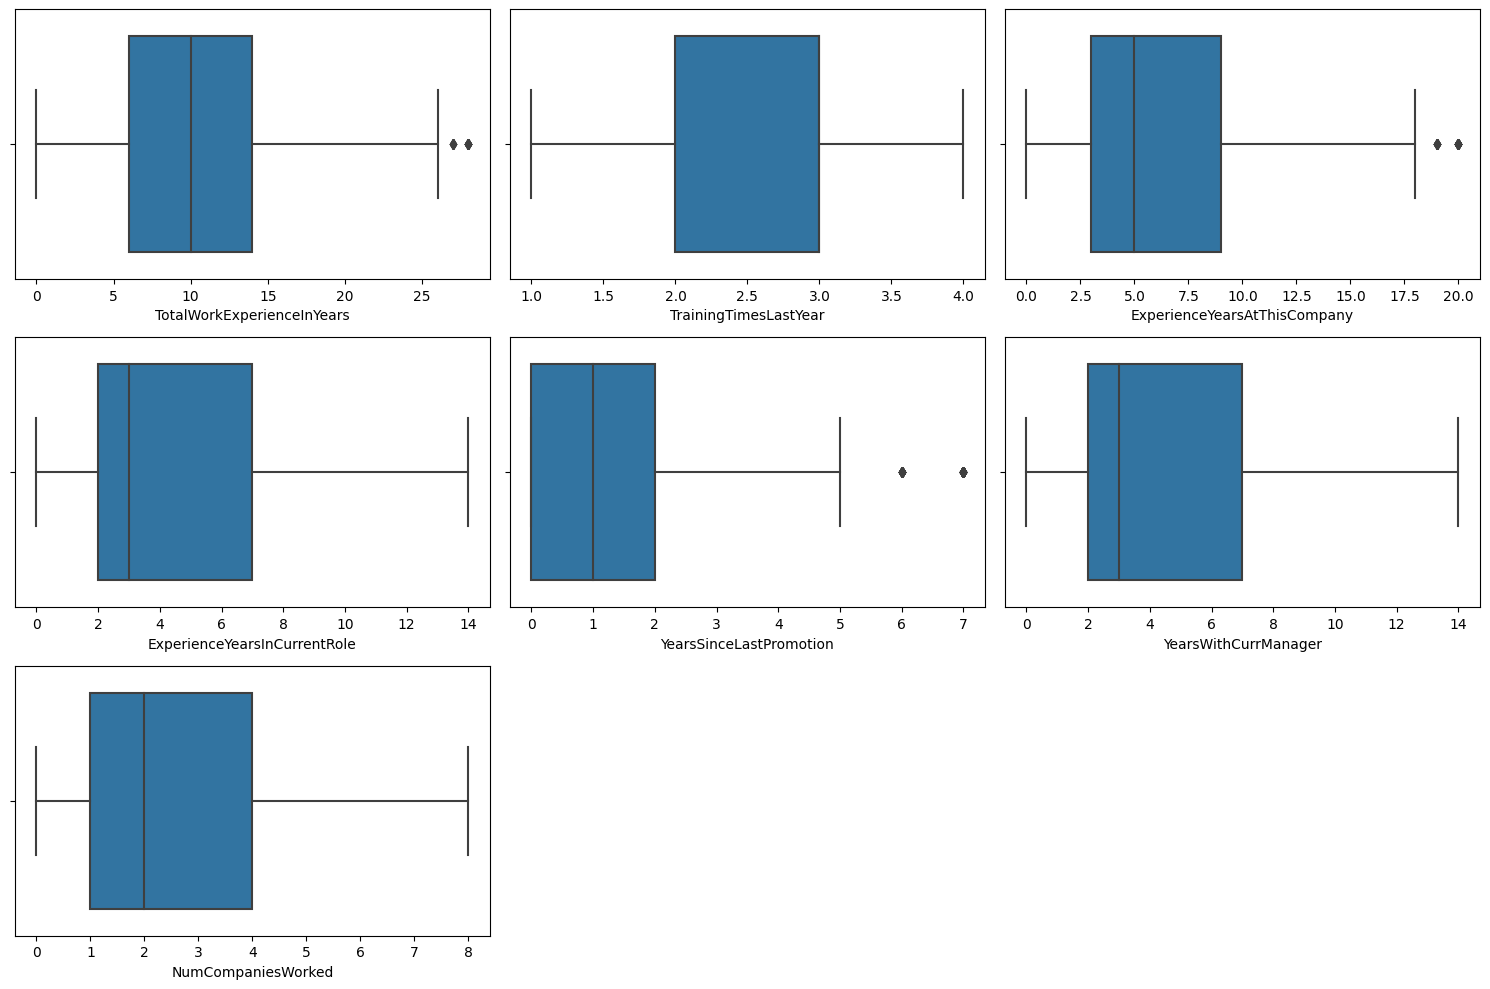

In [ ]:
out = data[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager', 'NumCompaniesWorked']]

plotnumber = 1
plt.figure(figsize=(15, 10))
for column in out.columns:
    if plotnumber <= 7: # set the limit
          plt.subplot(3, 3, plotnumber)# # hình gồm 3 hàng và 3 cột, plotnumber là thứ tự mỗi hình nhỏ bên trong
          sns.boxplot(data=out, x=column)# Plotting box plots để phát hiện outlier
          plt.xlabel(column, fontsize=10)  # Thay đổi cỡ chữ tại đây
          plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,5,6,1,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


##checking correlation

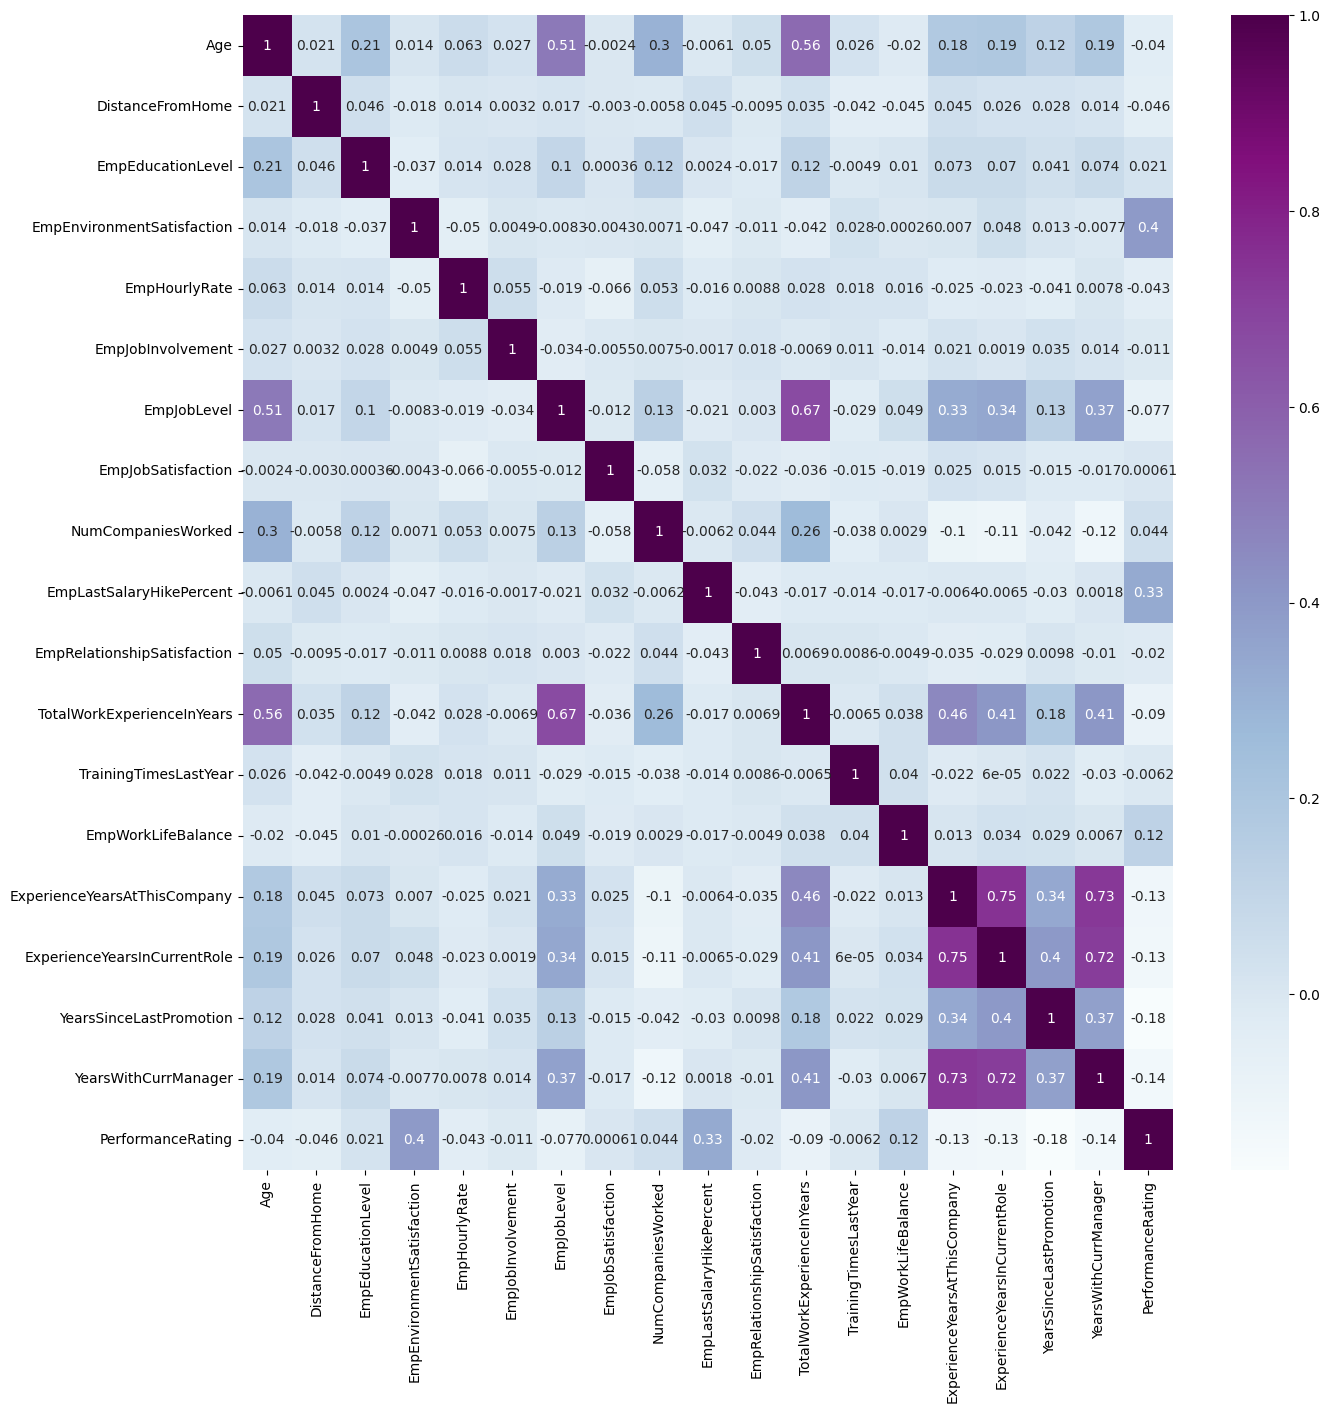

In [ ]:
# Vẽ heatmap thể hiện mối tương quan giữa các biến
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

Từ heatmap ta thấy không có cặp nào có mối tương quan cao. Tuy nhiên ta cần kiểm tra lại thêm một lần nữa.

In [ ]:
corr = data.corr().abs() # quy về giá trị lớn nhất không tính âm dương

# Chọn tam giác trên của ma trận tương quan
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Tìm các feature có mối tương quan cao hơn 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

[]


#Trực quan đơn biến

##QUALITATIVE

###NOMINAL DATA

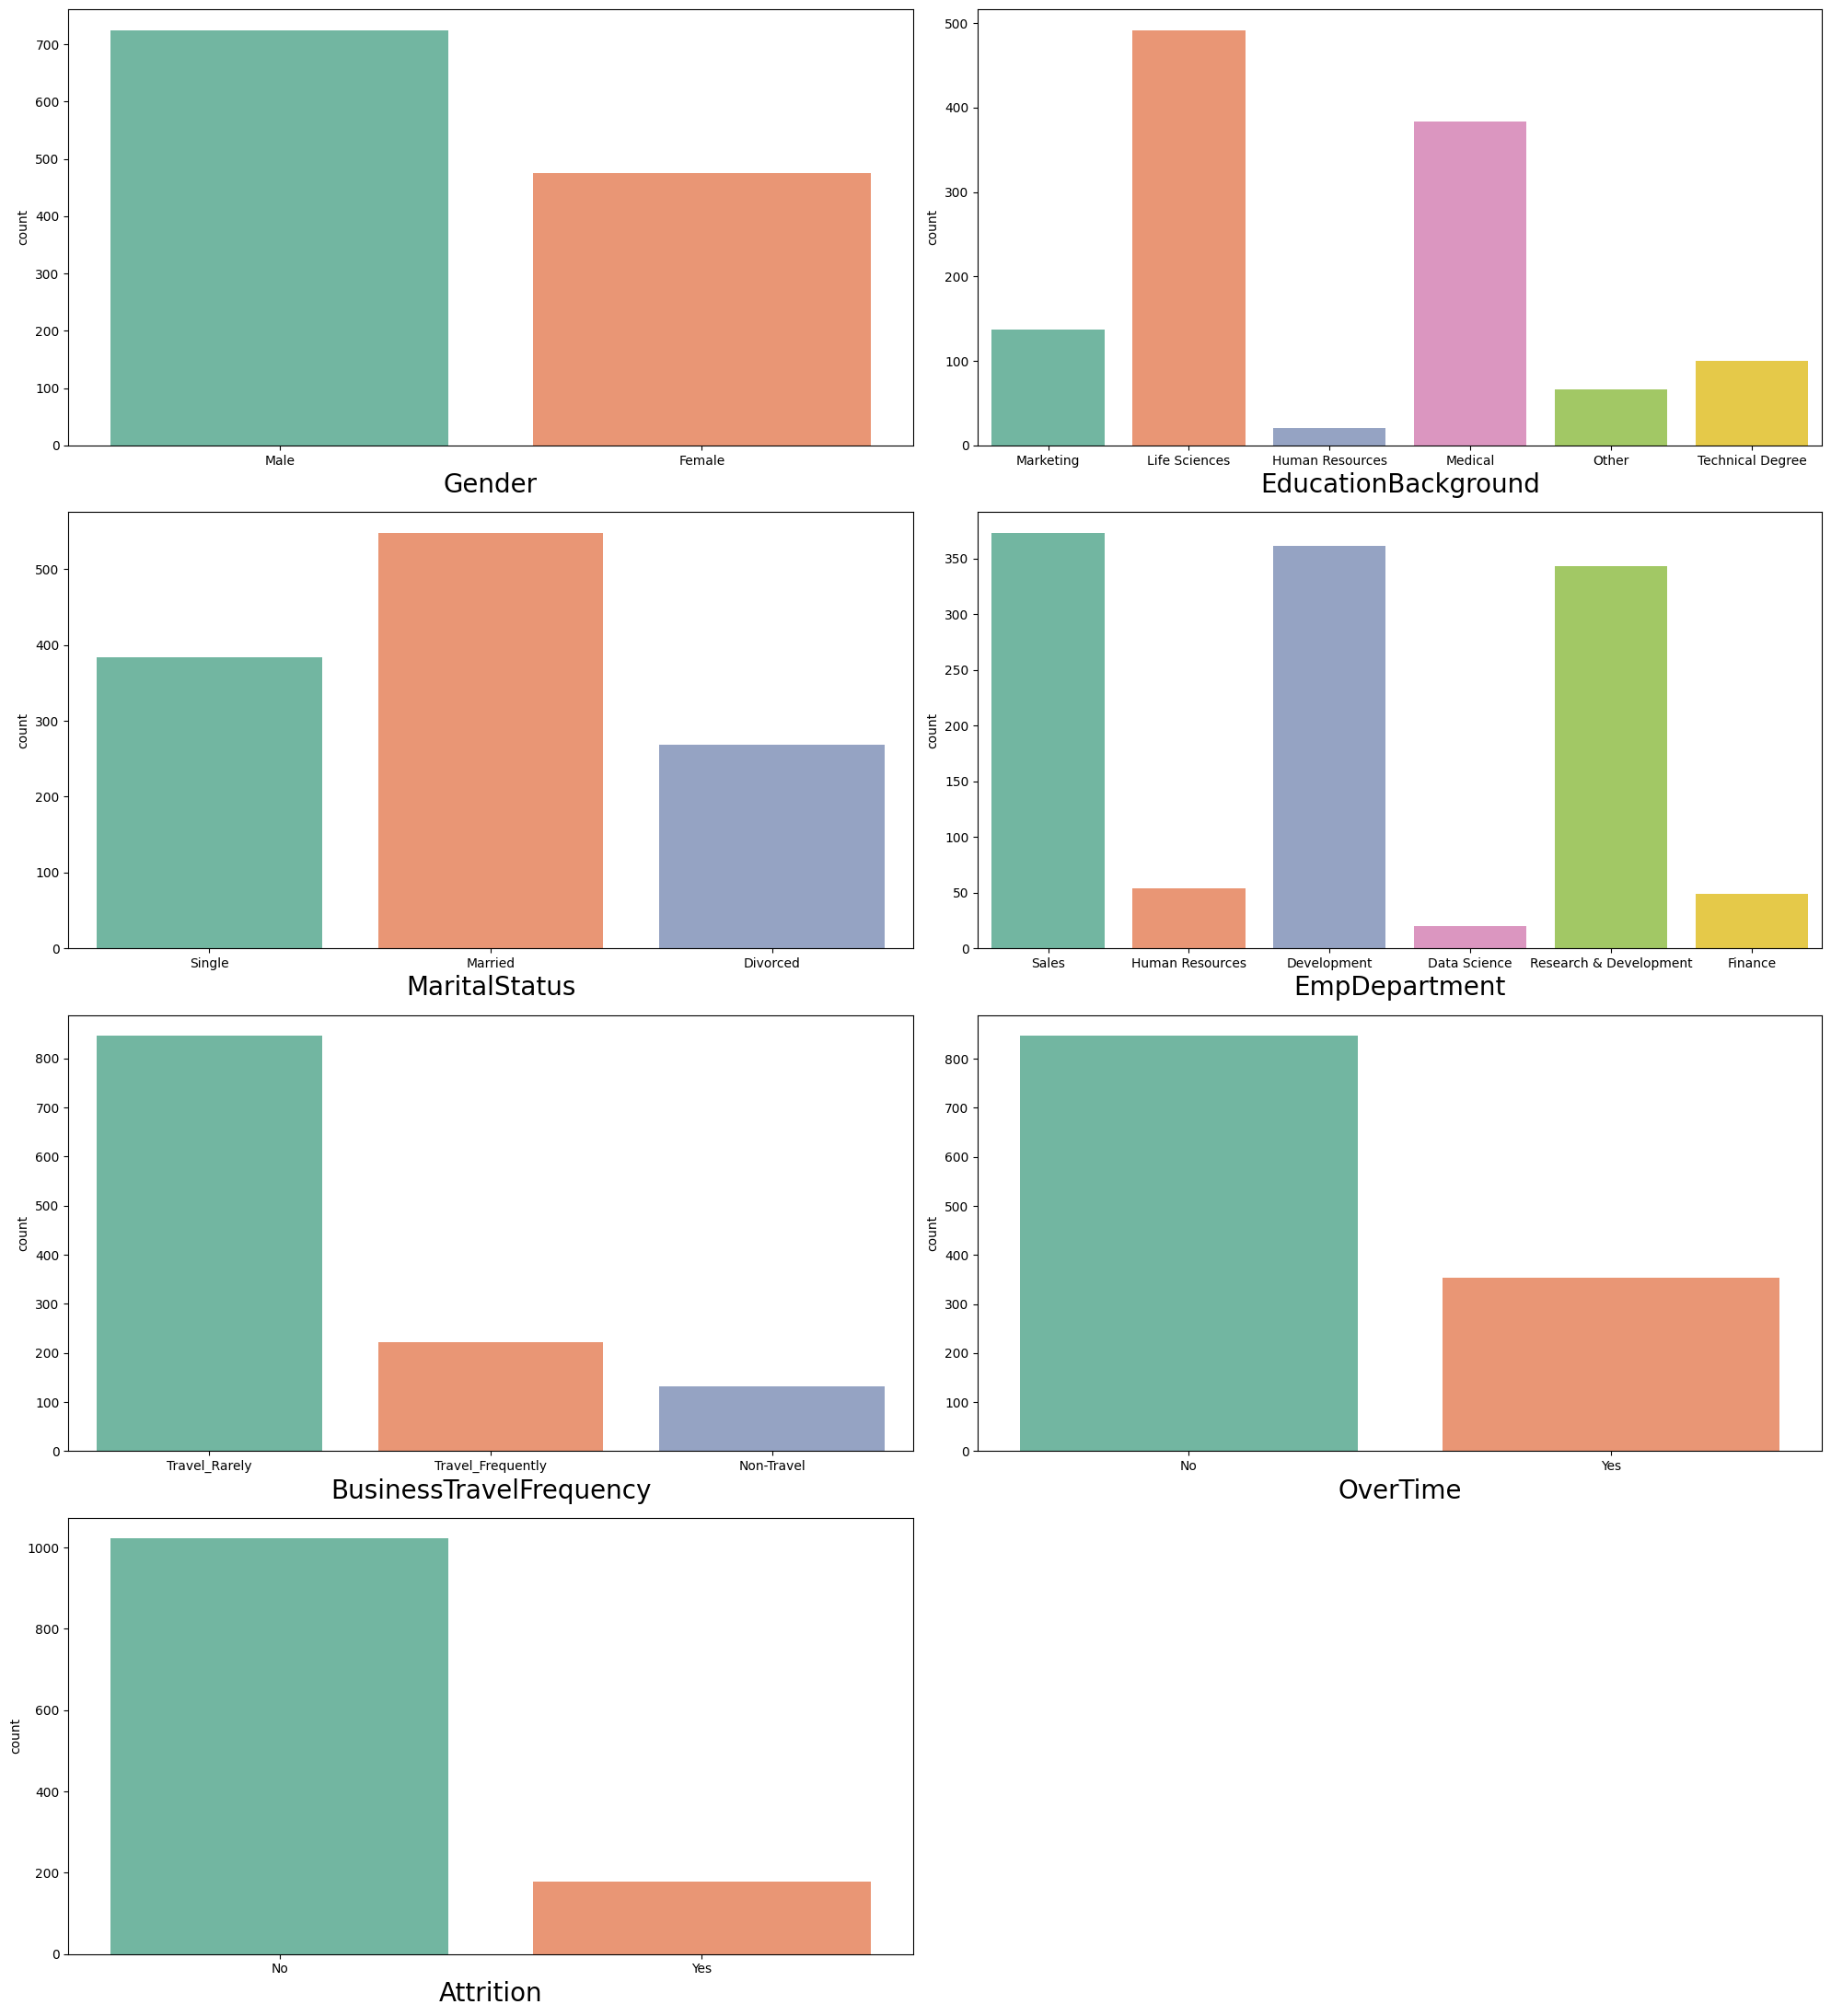

In [ ]:
count1 = data[['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
               'BusinessTravelFrequency', 'OverTime', 'Attrition']]  # Tạo danh sách các thuộc tính để vẽ đồ thị

plt.figure(figsize=(20,22)) # Xác định kích thước của đồ thị
plotno = 1 # Biến đếm

for column in count1: # Lặp qua từng cột
    if plotno<=10:    # Giới hạn số lượng đồ thị
        plt.subplot(4,2,plotno) # Vẽ đồ thị (4 hàng, 2 cột), plotno là số thứ tự của đồ thị
        sns.countplot(x=count1[column], palette='Set2') # Vẽ đồ thị countplot với màu sắc từ palette 'Set2'
        plt.xlabel(column,fontsize=20)  # Đặt tên cho trục x và cỡ chữ là 20
    plotno+=1 # Tăng biến đếm

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

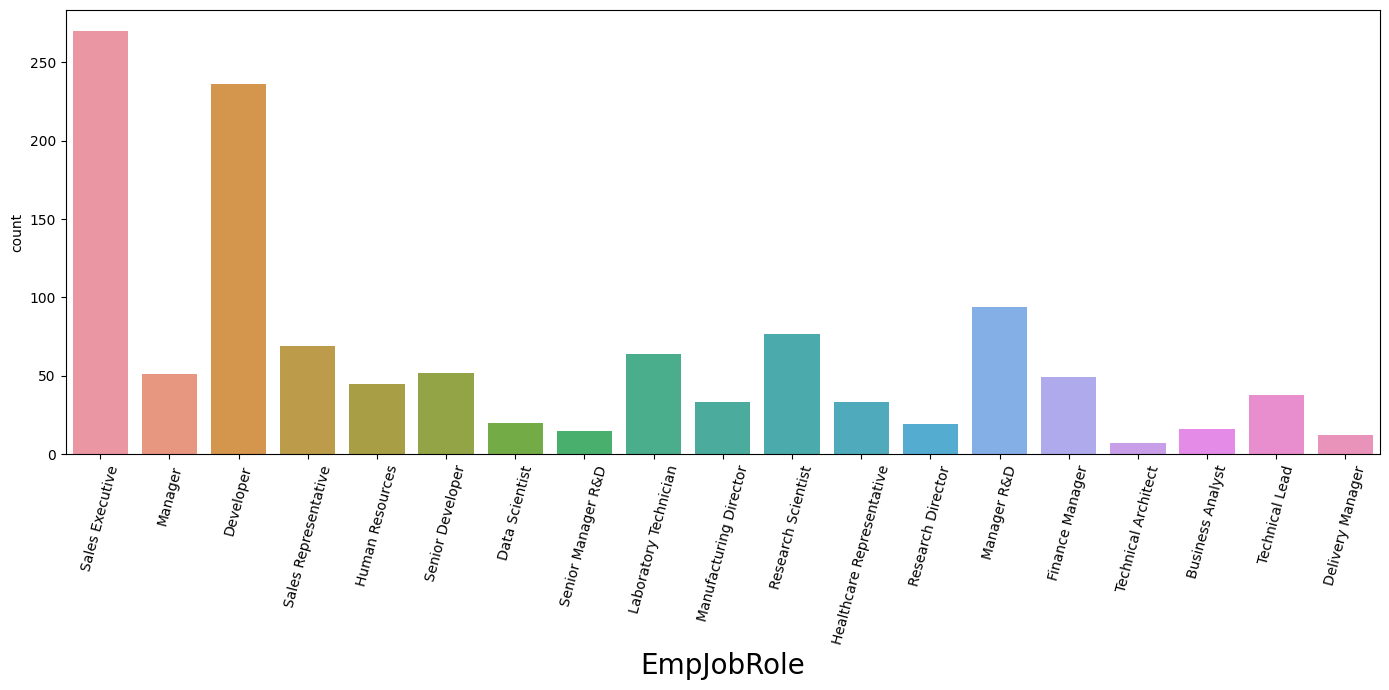

In [ ]:
#Trực quan cho biến EmpJobRole
plt.figure(figsize=(14,7))
sns.countplot(x='EmpJobRole', data=data)
plt.xticks(rotation=75)
plt.xlabel('EmpJobRole',fontsize=20)
plt.tight_layout()
plt.show()

###ORDINAL DATA

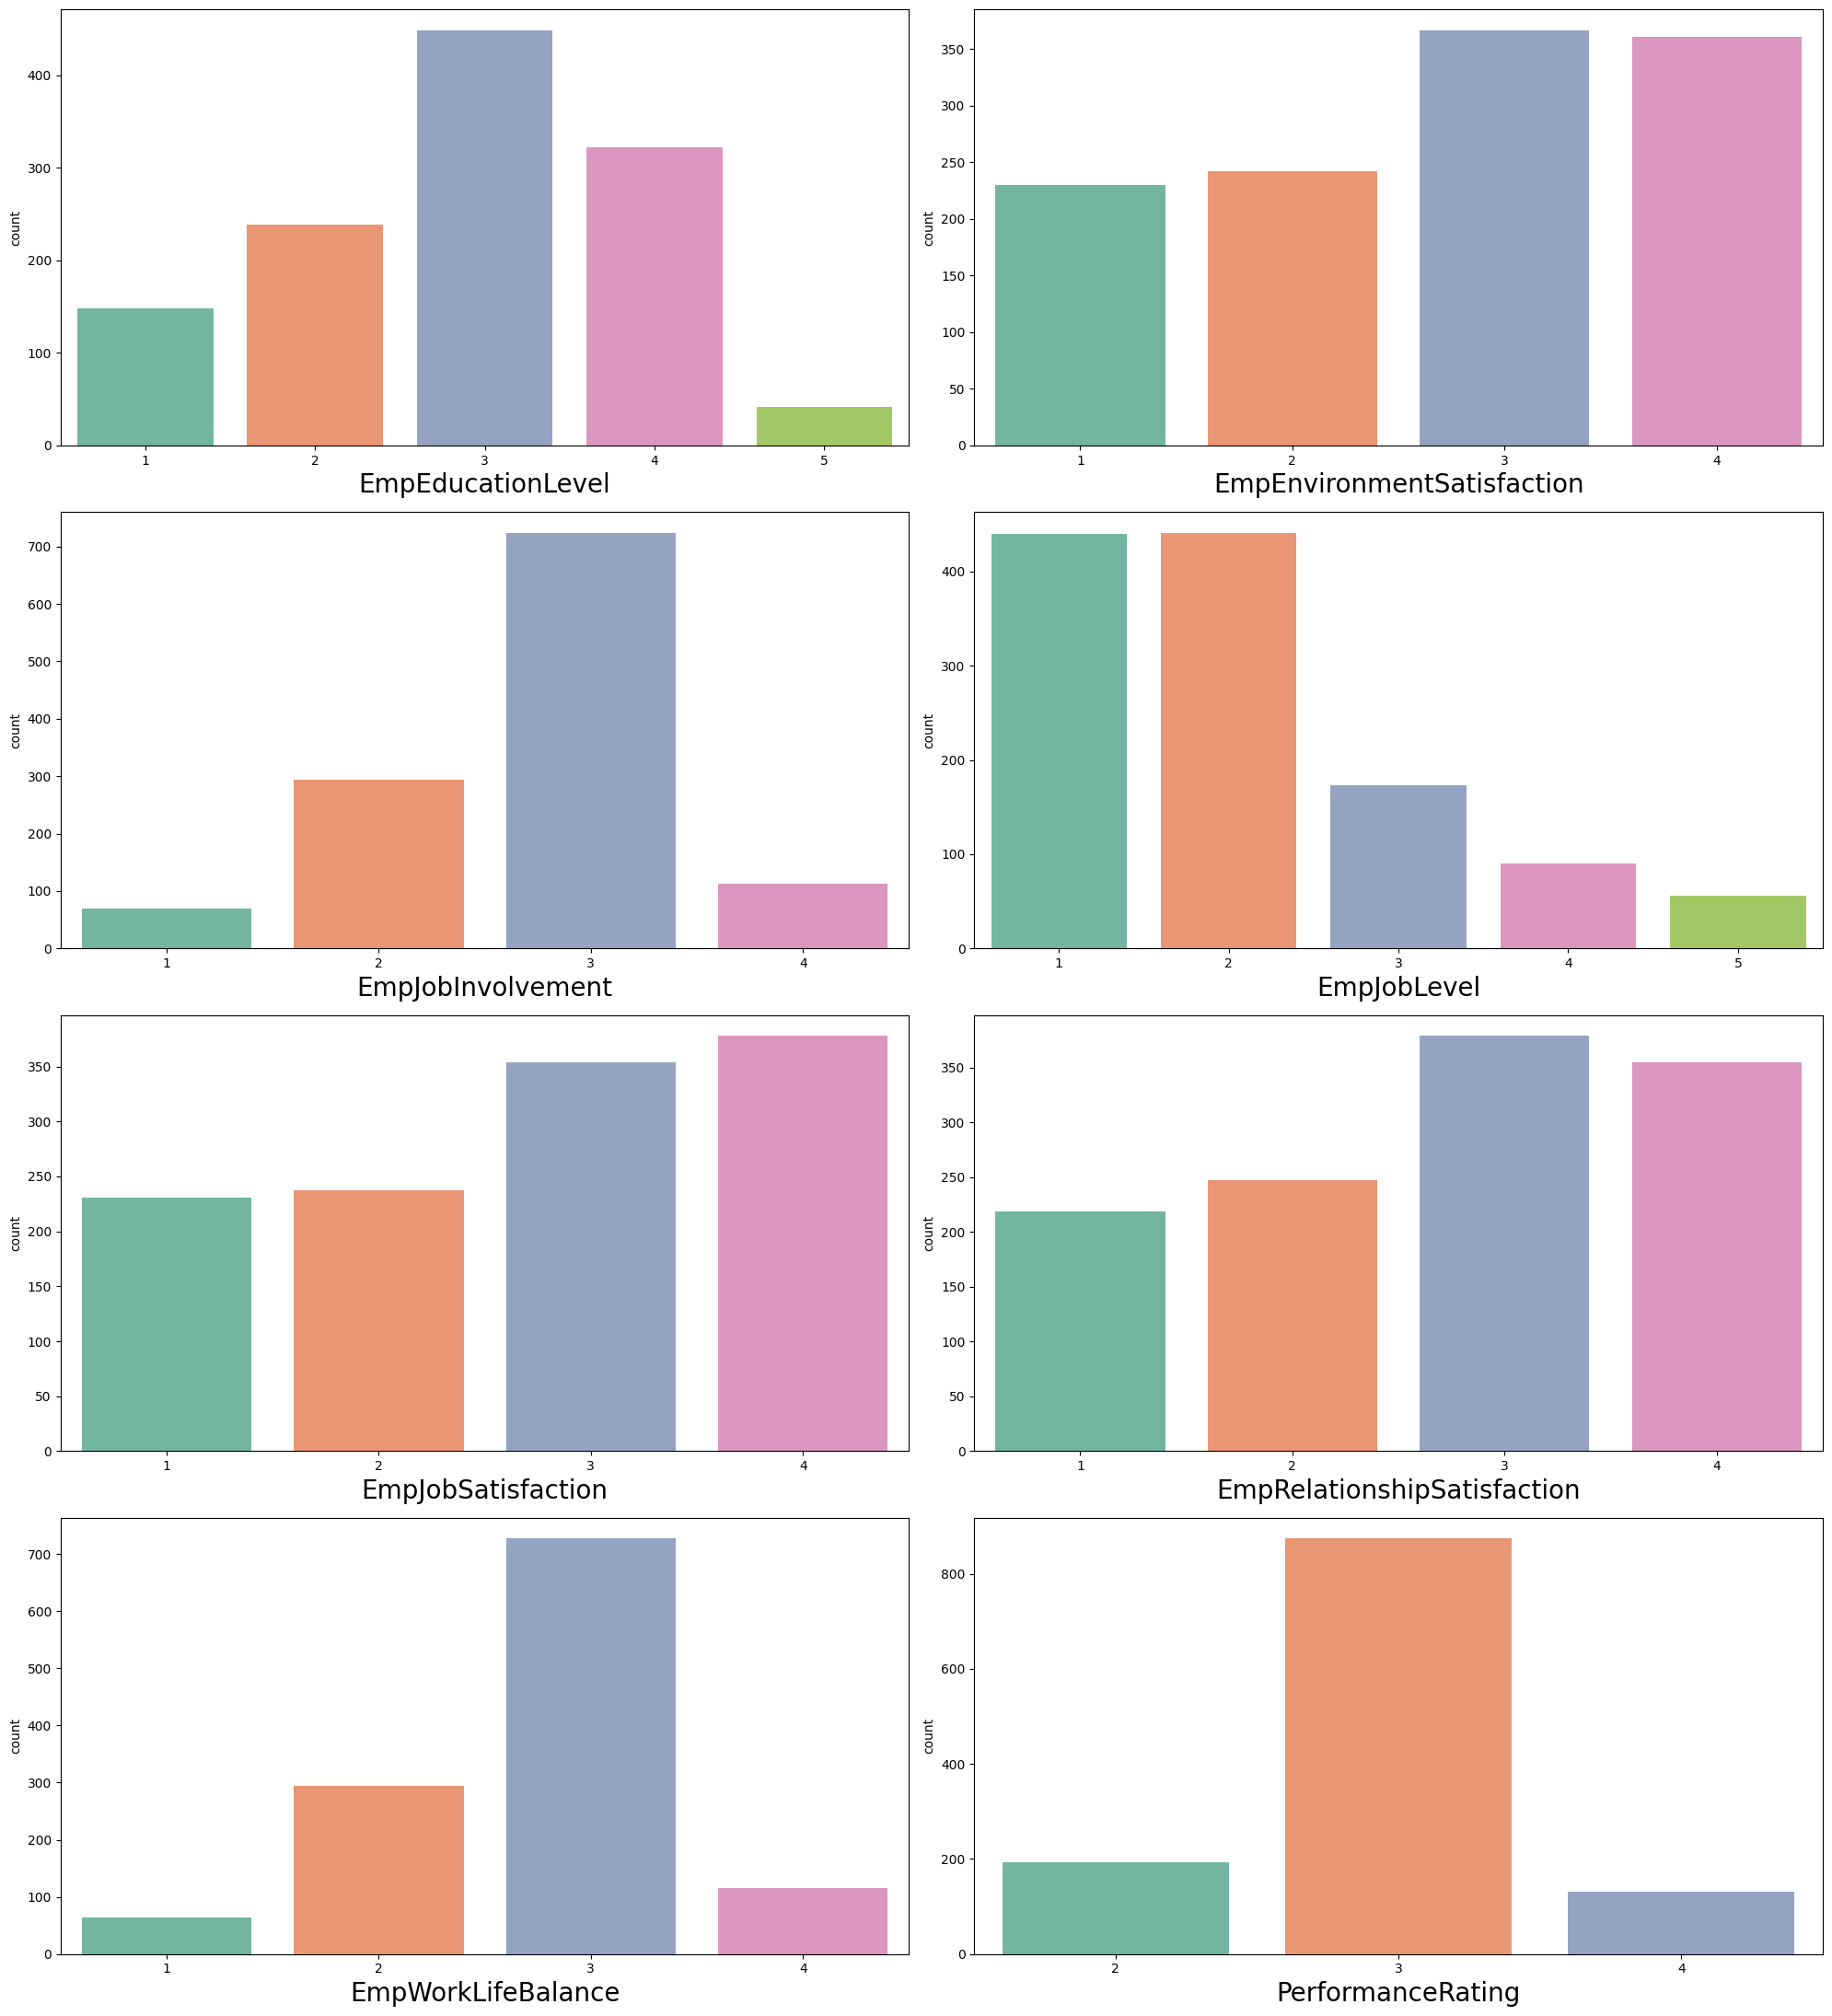

In [ ]:
count2 = data[['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel',
               'EmpJobSatisfaction', 'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance', 'PerformanceRating']]  # Tạo danh sách các thuộc tính để vẽ đồ thị

plt.figure(figsize=(20,22)) # Xác định kích thước của đồ thị
plotno = 1 # Biến đếm


for column in count2: # Lặp qua từng cột
    if plotno<=10:    # Giới hạn số lượng đồ thị
        plt.subplot(4,2,plotno) # Vẽ đồ thị (4 hàng, 2 cột), plotno là số thứ tự của đồ thị
        sns.countplot(x=count2[column], palette='Set2') # Vẽ đồ thị countplot với màu sắc từ palette 'Set2'
        plt.xlabel(column,fontsize=20)  # Đặt tên cho trục x và cỡ chữ là 20
    plotno+=1 # Tăng biến đếm
#Hiển thị đồ thị
plt.tight_layout()
plt.show()

##QUANTITATIVE

###DISCRETE DATA

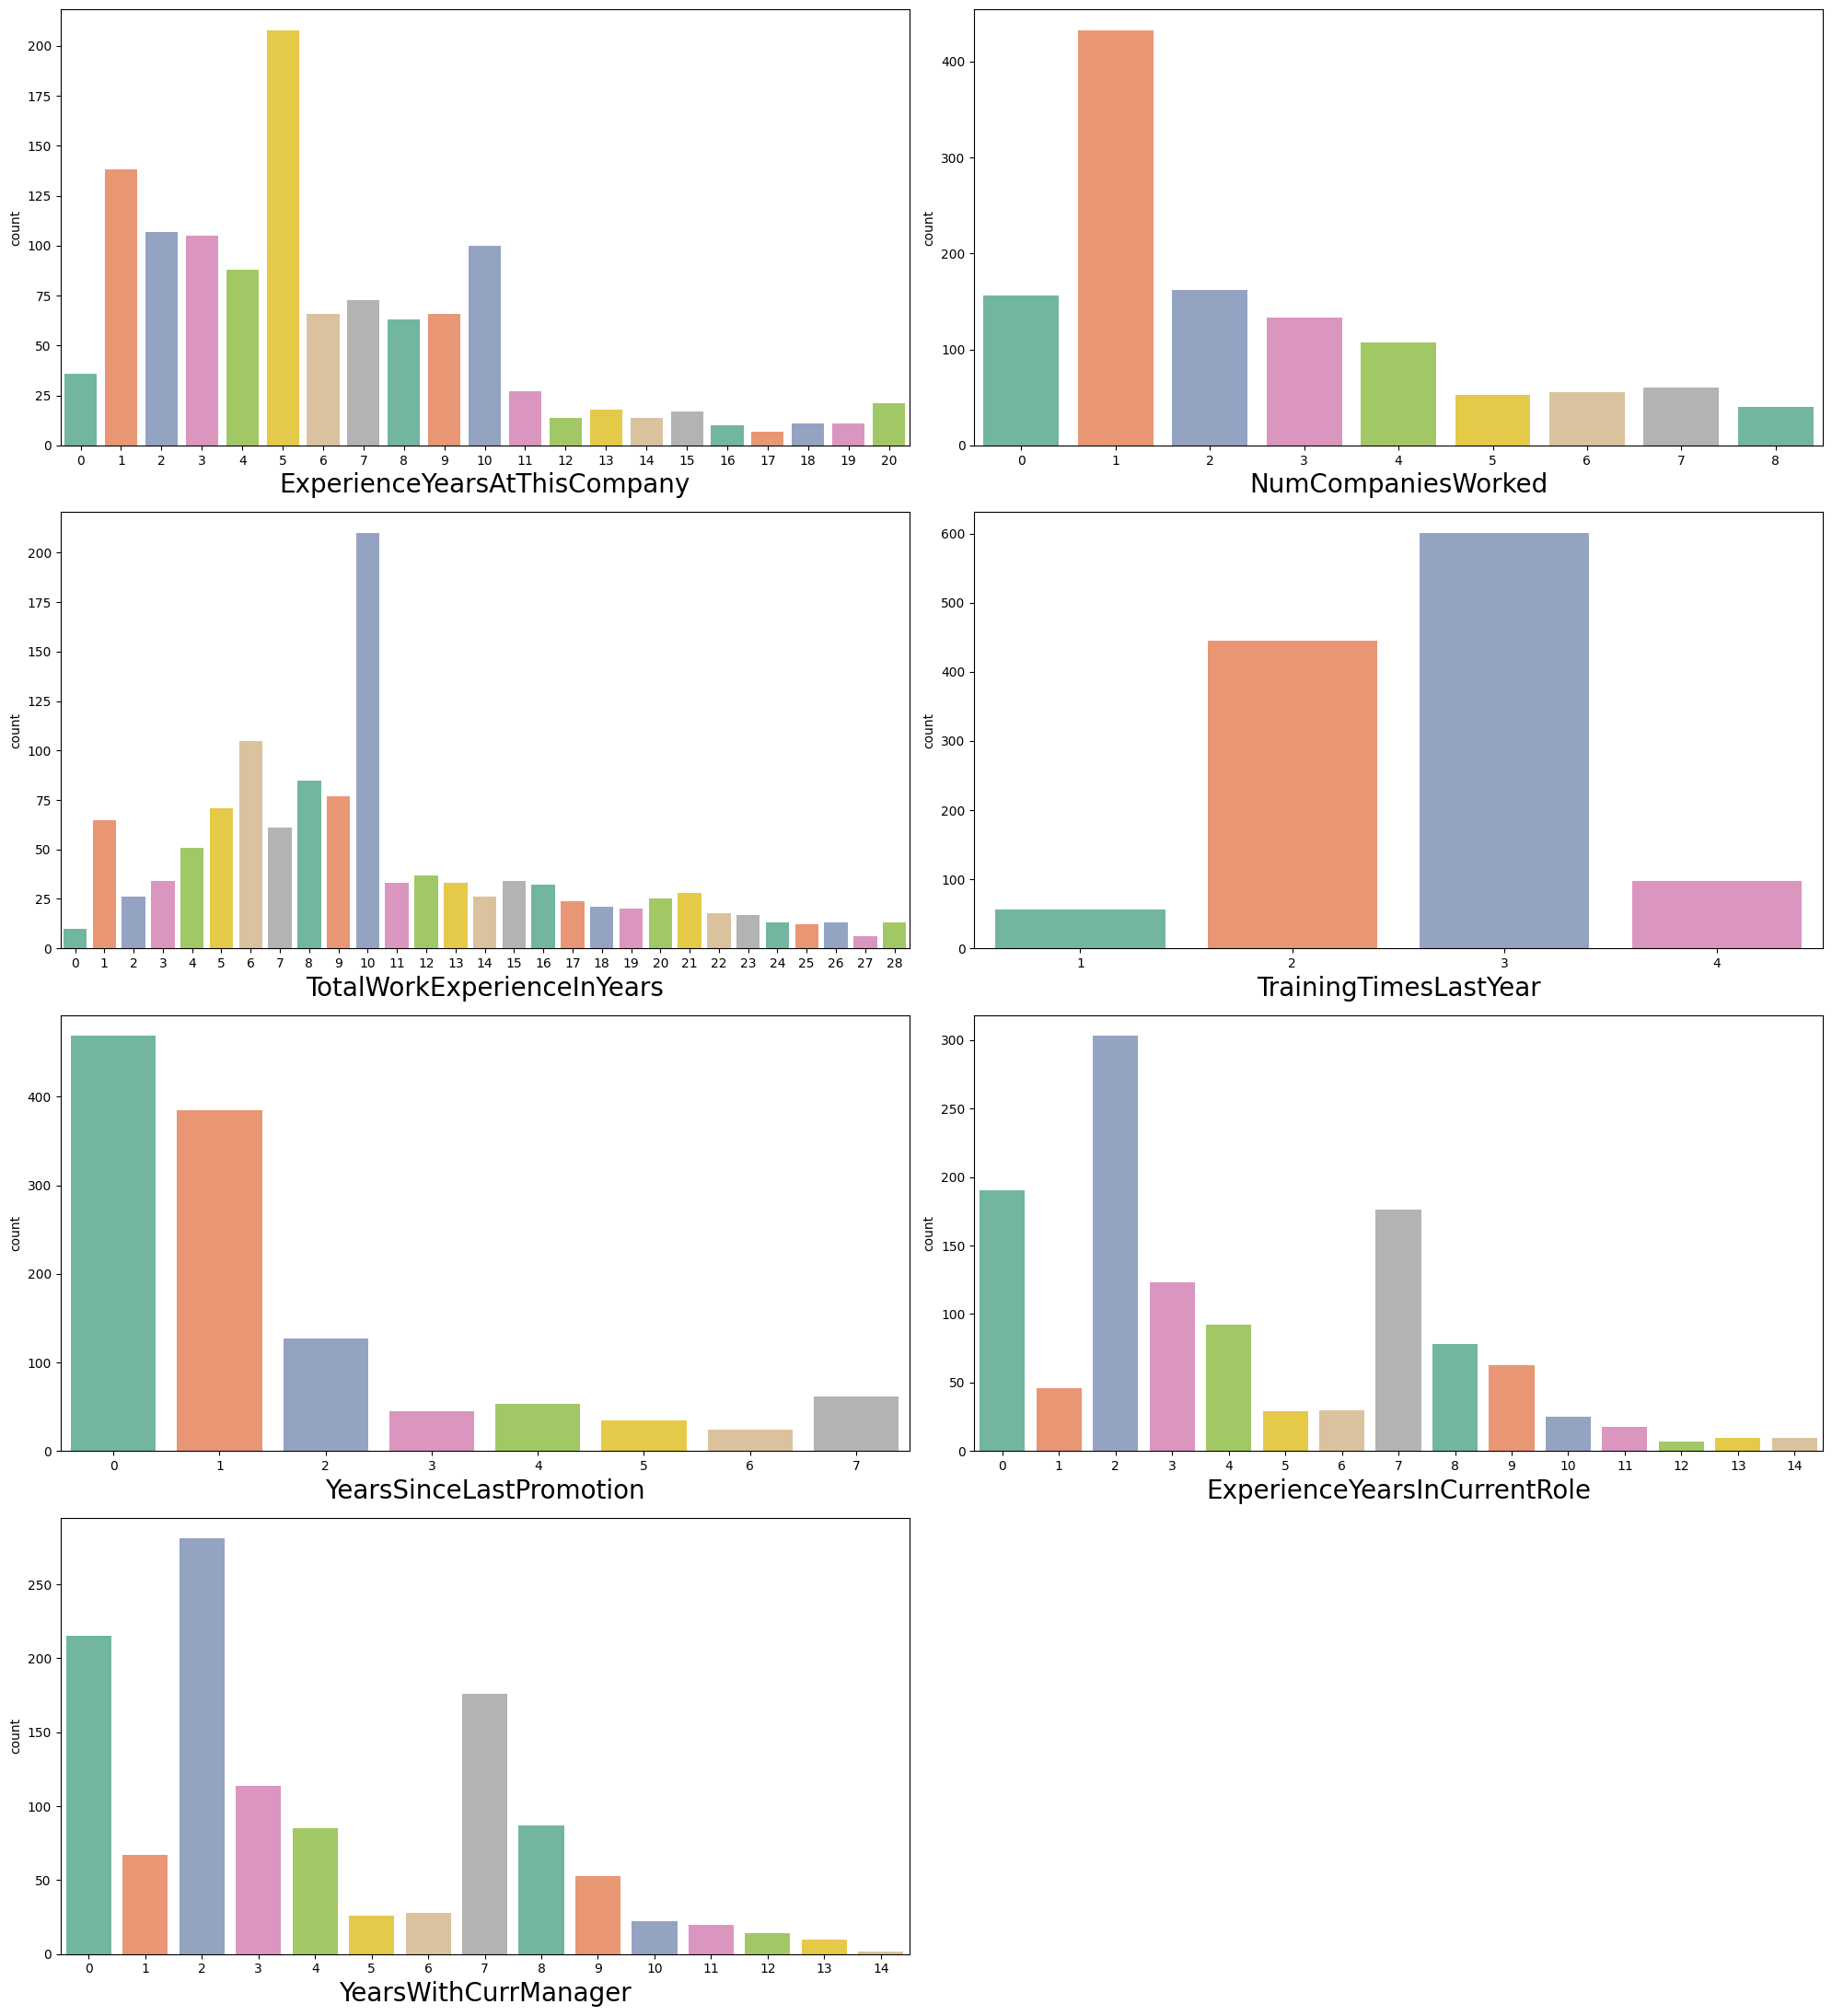

In [ ]:
count3 = data[['ExperienceYearsAtThisCompany', 'NumCompaniesWorked', 'TotalWorkExperienceInYears',
               'TrainingTimesLastYear','YearsSinceLastPromotion', 'ExperienceYearsInCurrentRole',
               'YearsWithCurrManager']]  # Tạo danh sách các thuộc tính để vẽ đồ thị
plt.figure(figsize=(20,22)) # Xác định kích thước của đồ thị
plotno = 1 # Biến dếm

for column in count3: # Lặp qua từng cột
    if plotno<=10:    # Giới hạn số lượng đồ thị
        plt.subplot(4,2,plotno) # Vẽ đồ thị (4 hàng, 2 cột), plotno là số thứ tự của đồ thị
        sns.countplot(x=count3[column], palette='Set2')  #Vẽ đồ thị countplot với màu sắc từ palette 'Set2'
        plt.xlabel(column,fontsize=20)  # Đặt tên cho trục x và cỡ chữ là 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

###CONTINUOUS DATA

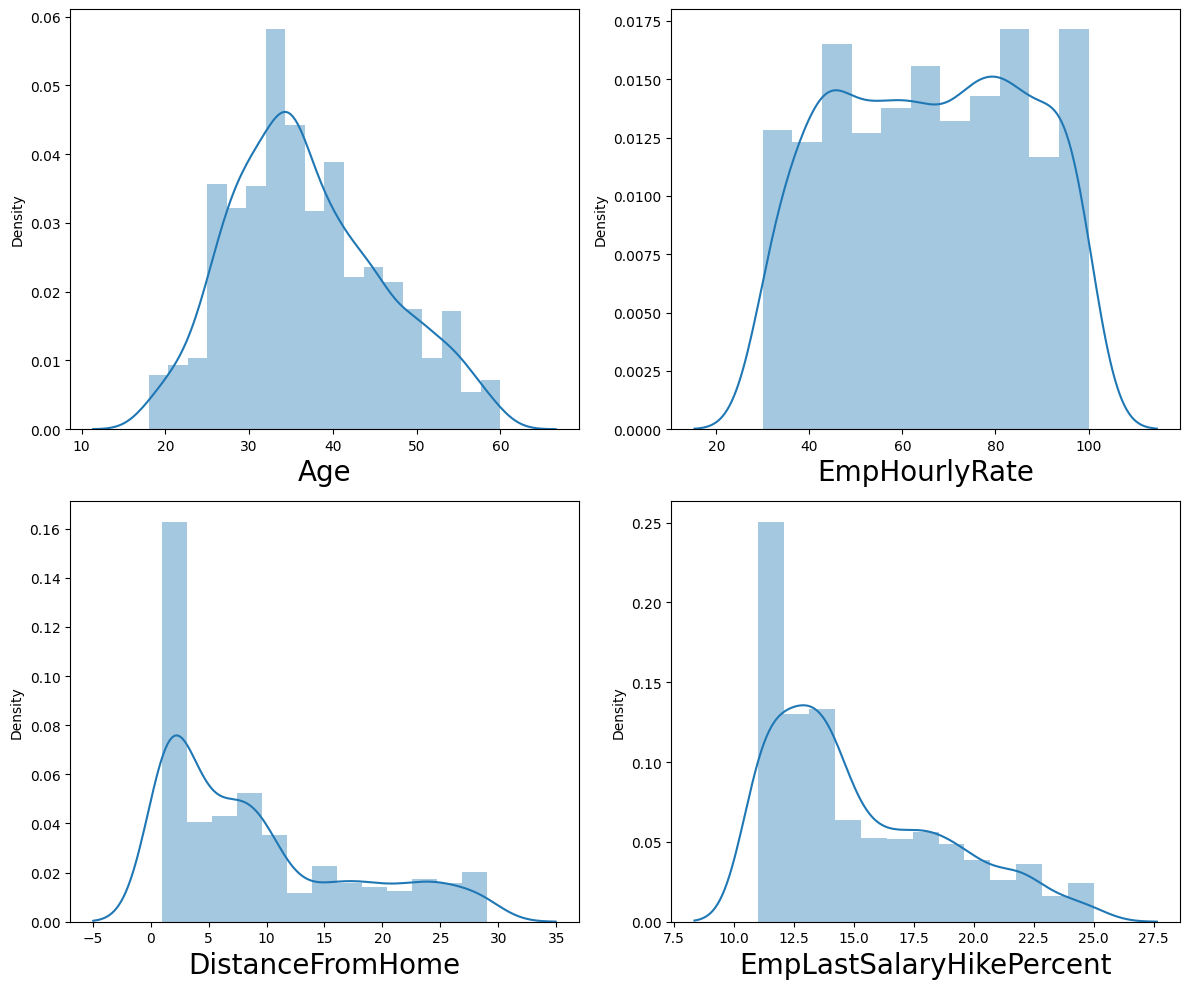

In [ ]:
count4 = data[['Age', 'EmpHourlyRate', 'DistanceFromHome', 'EmpLastSalaryHikePercent']]  # Tạo danh sách các thuộc tính để vẽ đồ thị
plt.figure(figsize=(12,10)) # Xác định kích thước của đồ thị
plotno = 1 # Biến đếm

for column in count4: # Lặp qua từng cột
    if plotno<=10:    # Giới hạn số lượng đồ thị
        plt.subplot(2,2,plotno) # Vẽ đồ thị (2 hàng, 2 cột), plotno là số thứ tự của đồ thị
        sns.distplot(x=count4[column], kde = True, hist = True)
        plt.xlabel(column,fontsize=20) # Đặt tên cho trục x và cỡ chữ là 20
    plotno+=1 # Tăng biến đếm

# Hiển thị đồ thị
plt.tight_layout()
plt.show()


# Trực quan hai biến

In [ ]:
from itertools import combinations
from scipy.stats import chi2_contingency

categorical_vars = df.select_dtypes(include='object').columns
variable_pairs = list(combinations(categorical_vars, 2))

high_corr_pairs = []
max_chi2 = 0

for var_pair in variable_pairs:
    contingency_table = pd.crosstab(df[var_pair[0]], df[var_pair[1]])
    chi2, _, _, _ = chi2_contingency(contingency_table)

    # Điều kiện chọn cặp có chi2 lớn hơn ngưỡng xác định
    if chi2 > 5.0:
        high_corr_pairs.append((var_pair, chi2))
        if chi2 > max_chi2:
            max_chi2 = chi2

# In ra tất cả các cặp biến có độ tương quan cao nhất
for pair, chi2_val in high_corr_pairs:
    if chi2_val == max_chi2:
        print(f"Cặp biến có độ tương quan cao nhất: {pair} với giá trị chi-square là {chi2_val}")
    else:
        print(f"Cặp biến: {pair} có giá trị chi-square là {chi2_val}")


Cặp biến: ('EmpNumber', 'Gender') có giá trị chi-square là 1200.0
Cặp biến: ('EmpNumber', 'EducationBackground') có giá trị chi-square là 6000.0
Cặp biến: ('EmpNumber', 'MaritalStatus') có giá trị chi-square là 2400.0
Cặp biến: ('EmpNumber', 'EmpDepartment') có giá trị chi-square là 6000.000000000001
Cặp biến có độ tương quan cao nhất: ('EmpNumber', 'EmpJobRole') với giá trị chi-square là 21600.0
Cặp biến: ('EmpNumber', 'BusinessTravelFrequency') có giá trị chi-square là 2400.0
Cặp biến: ('EmpNumber', 'OverTime') có giá trị chi-square là 1199.9999999999998
Cặp biến: ('EmpNumber', 'Attrition') có giá trị chi-square là 1200.0
Cặp biến: ('Gender', 'EmpJobRole') có giá trị chi-square là 31.042599580750444
Cặp biến: ('EducationBackground', 'MaritalStatus') có giá trị chi-square là 7.26176605251847
Cặp biến: ('EducationBackground', 'EmpDepartment') có giá trị chi-square là 805.4393805396762
Cặp biến: ('EducationBackground', 'EmpJobRole') có giá trị chi-square là 752.7124463722
Cặp biến: ('Ed

Sau khi sử dụng kiểm định Chi-Square thì ta tìm ra được những cặp biến phân loại có sự tương quan cao (không xét những biến định danh)

In [ ]:
# Sắp xếp danh sách high_corr_pairs theo giá trị chi2 giảm dần
sorted_pairs = sorted(high_corr_pairs, key=lambda x: x[1], reverse=True)

# Chọn ra 3 cặp có độ tương quan cao nhất ngoại trừ những cặp có chứa EmpNumber
top_3_pairs_excluding_empnumber = []
count = 0

for pair, chi2_val in sorted_pairs:
    if 'EmpNumber' not in pair:
        top_3_pairs_excluding_empnumber.append((pair, chi2_val))
        count += 1
        if count == 3:
            break

# In ra 3 cặp có độ tương quan cao nhất, loại bỏ những cặp chứa EmpNumber
for pair, chi2_val in top_3_pairs_excluding_empnumber:
    print(f"Cặp biến: {pair} có giá trị chi-square là {chi2_val}")


Cặp biến: ('EmpDepartment', 'EmpJobRole') có giá trị chi-square là 5775.234981008873
Cặp biến: ('EducationBackground', 'EmpDepartment') có giá trị chi-square là 805.4393805396762
Cặp biến: ('EducationBackground', 'EmpJobRole') có giá trị chi-square là 752.7124463722


Các biến xét độ tương quan cao nhất không phải là những cặp biến có chứa biến target nên ta đi xét từng biến với biến target để có thể đưa ra kết luận cho mục tiêu của bài là "Phân tích những yếu tố có ảnh hưởng đến hiệu suất làm việc của nhân viên". Từ đó đưa ra những dự đoán và biện pháp nâng cao hiệu suất làm việc của nhân viên tại công ty

đa biến


In [ ]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,5,6,1,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


# **Xét tương quan giữa biến nominal categorical và biến target**

In [ ]:
categorical = []  # Tạo DF cho nominal data
for column in data.columns:
    if data[column].dtype == object:
        categorical.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")


Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime : ['No' 'Yes']
Attrition : ['No' 'Yes']


In [ ]:
categorical  #Danh sách các thuộc tính

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

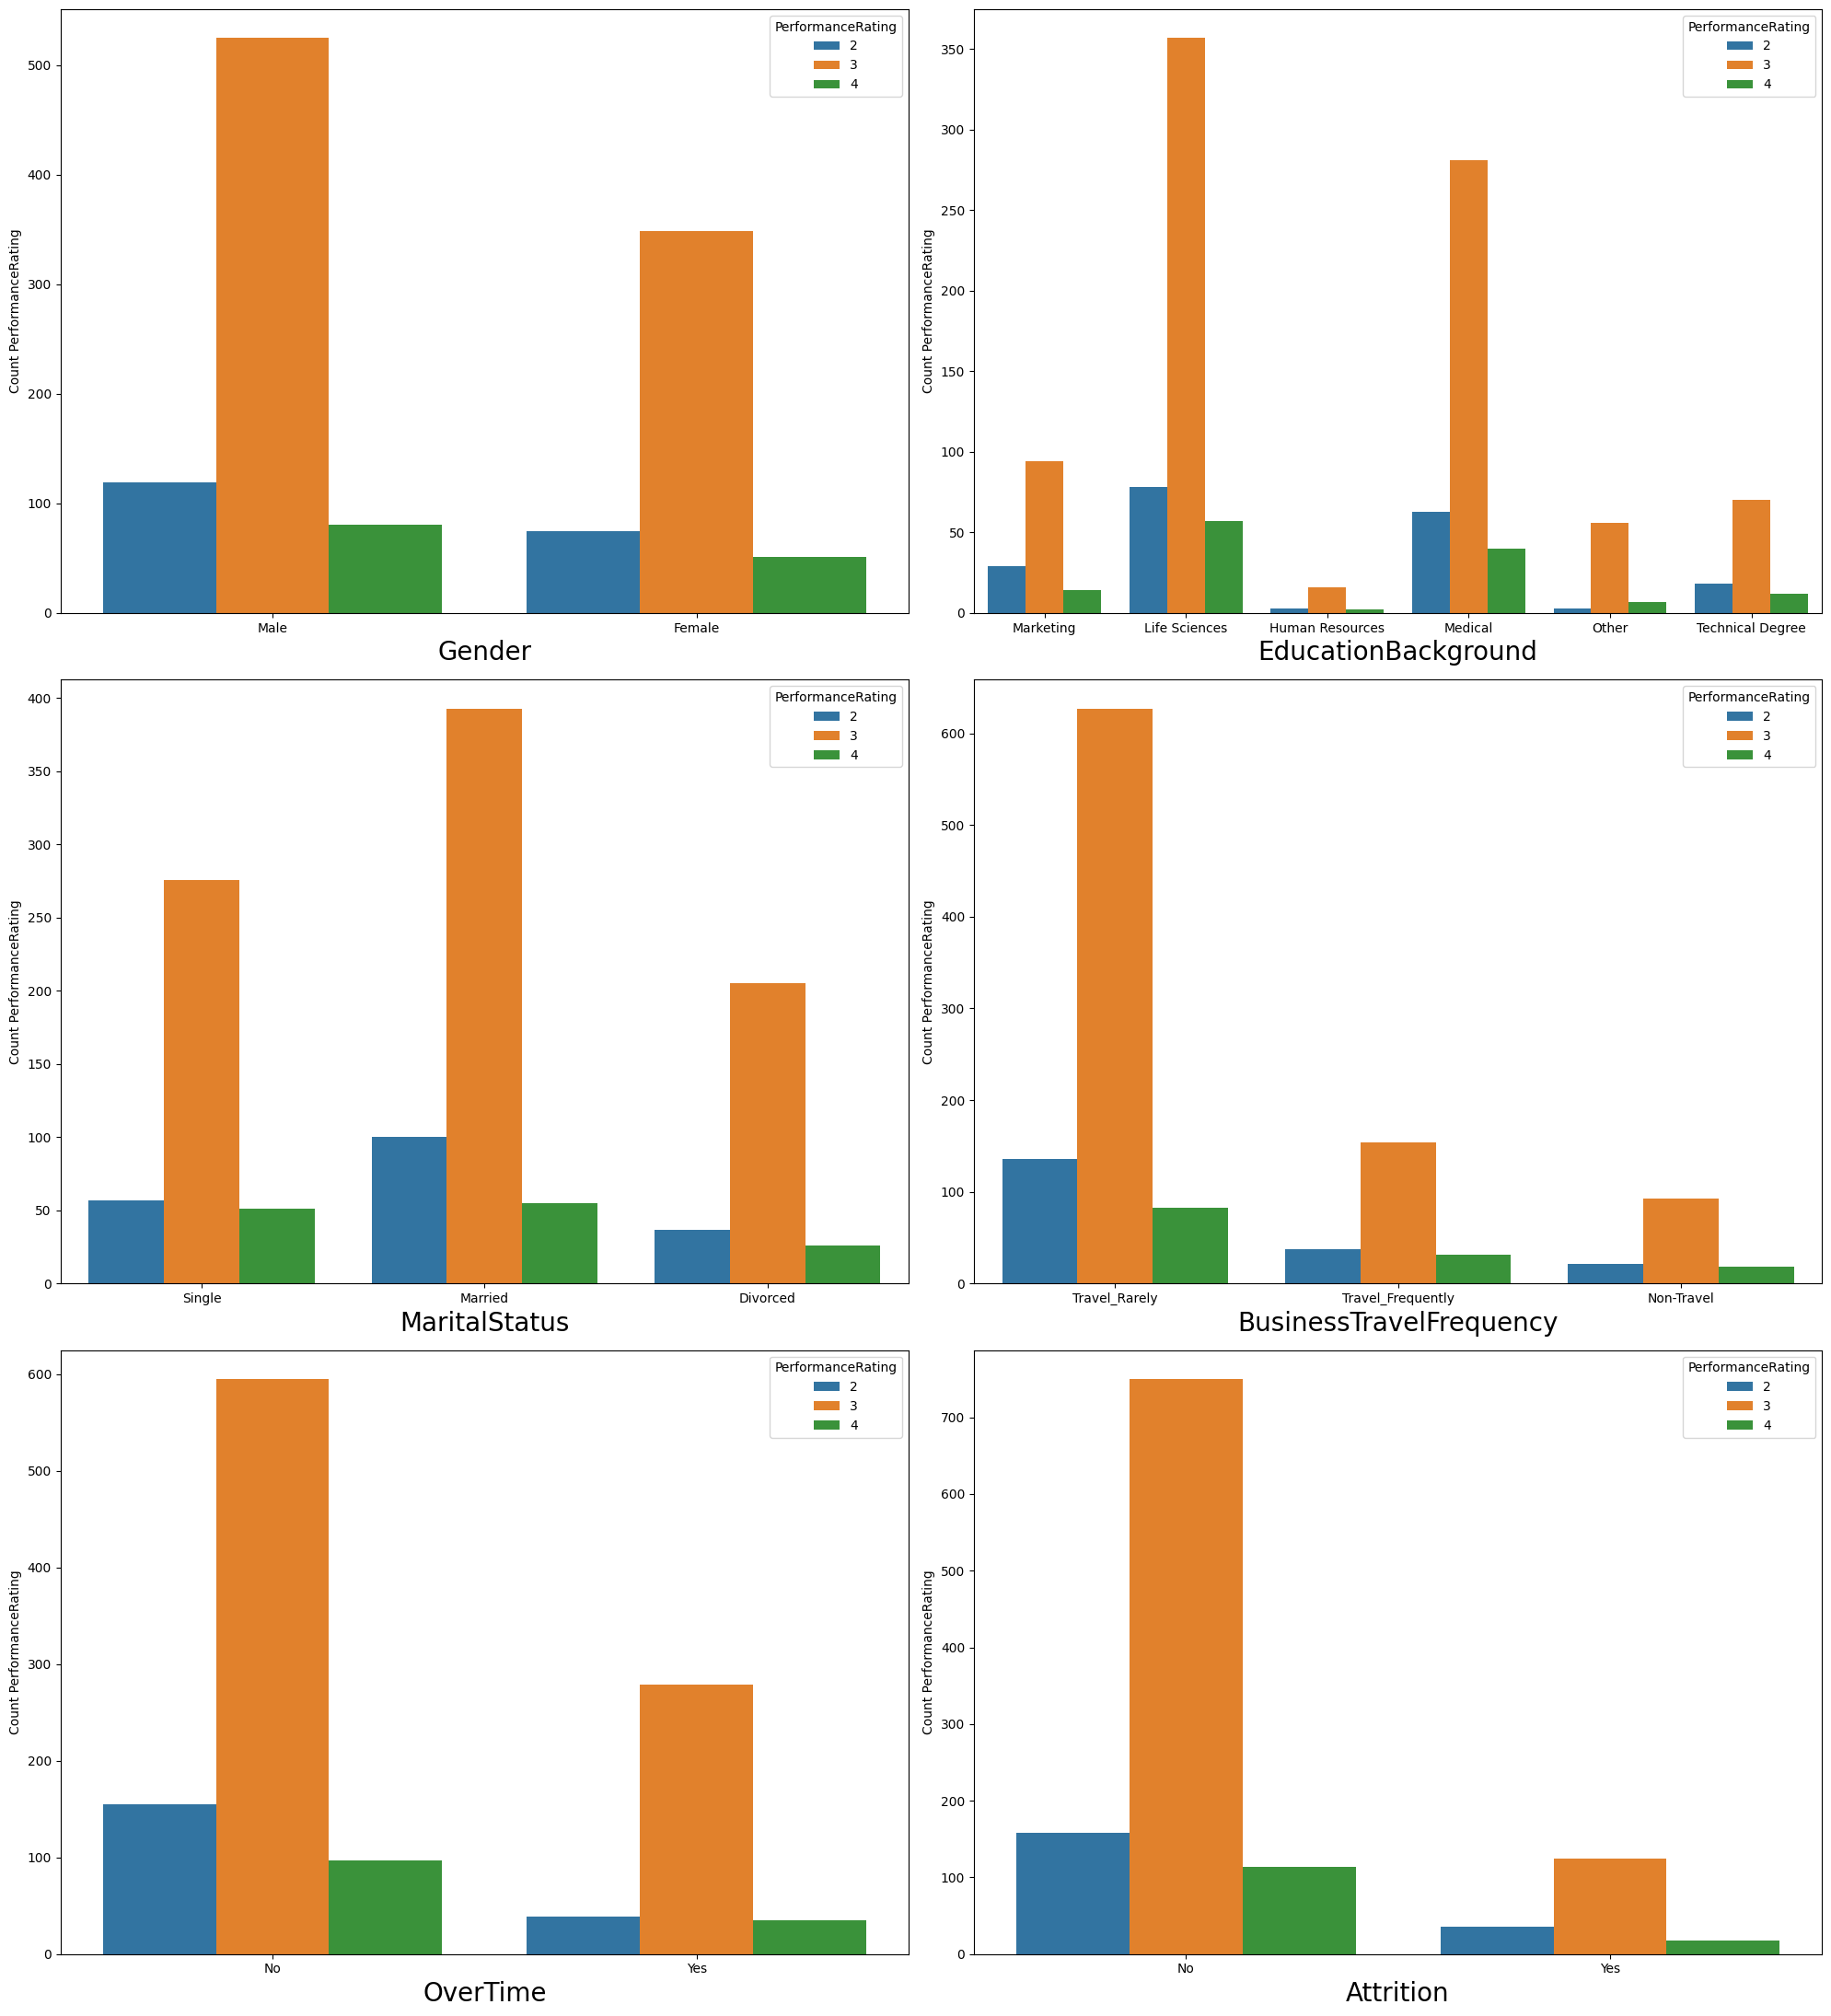

In [ ]:
# Lập danh sách các thuộc tính categorical và sử dụng plot để biểu diễn các thuộc tính
categorical_col = data[['Gender','EducationBackground','MaritalStatus','BusinessTravelFrequency','OverTime','Attrition']]
plt.figure(figsize=(20,22)) # Xác định kích thước
plotno = 1

for column in categorical_col:
    if plotno<=7:
        plt.subplot(3,2,plotno)
        sns.countplot(x=categorical_col[column],hue=data.PerformanceRating) # Vẽ biểu đồ đếm vì những thuộc tính này là categorical
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count PerformanceRating')
    plotno+=1
plt.tight_layout()
plt.show()

In [ ]:
# Kiểm định bằng Chi-square cho các biến phân loại
from scipy.stats import chi2_contingency

# Chọn các cột cần thực hiện kiểm định chi-square
columns_of_interest = ['Gender', 'EducationBackground', 'MaritalStatus', 'BusinessTravelFrequency', 'OverTime', 'Attrition', 'PerformanceRating']
data_subset = data[columns_of_interest]

# Tạo bảng tần số cho từng cặp biến và thực hiện kiểm định chi-square
alpha = 0.05
confidence_level = 1 - alpha

for column in columns_of_interest[:-1]:  # Bỏ cột 'PerformanceRating' (biến target)
    contingency_table = pd.crosstab(data_subset[column], data_subset['PerformanceRating'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"Kiểm định chi-square cho cặp biến {column} và PerformanceRating:")
    print(f"  - Giá trị chi-square: {chi2}")
    print(f"  - P-value: {p}")
    if p < alpha:
        print("  - Có bằng chứng để bác bỏ giả thuyết H0: Hai biến không độc lập.")
    else:
        print("  - Không đủ bằng chứng để bác bỏ giả thuyết H0: Hai biến độc lập.")
    print("------------------------")


Kiểm định chi-square cho cặp biến Gender và PerformanceRating:
  - Giá trị chi-square: 0.1629500084051547
  - P-value: 0.9217557495859275
  - Không đủ bằng chứng để bác bỏ giả thuyết H0: Hai biến độc lập.
------------------------
Kiểm định chi-square cho cặp biến EducationBackground và PerformanceRating:
  - Giá trị chi-square: 10.217387658140966
  - P-value: 0.42163272056604756
  - Không đủ bằng chứng để bác bỏ giả thuyết H0: Hai biến độc lập.
------------------------
Kiểm định chi-square cho cặp biến MaritalStatus và PerformanceRating:
  - Giá trị chi-square: 6.133323065224635
  - P-value: 0.18941041088738678
  - Không đủ bằng chứng để bác bỏ giả thuyết H0: Hai biến độc lập.
------------------------
Kiểm định chi-square cho cặp biến BusinessTravelFrequency và PerformanceRating:
  - Giá trị chi-square: 4.397273699371299
  - P-value: 0.35490252129639344
  - Không đủ bằng chứng để bác bỏ giả thuyết H0: Hai biến độc lập.
------------------------
Kiểm định chi-square cho cặp biến OverTime

Từ biểu đồ trực quan và kiểm định ta có thể nhận ra rằng các biến phân loại không tương quan mạnh so với biến target, nghĩa là hai biến độc lập và ít có ảnh hưởng đến sự thay đổi của nhau
Khi các biến phân loại thay đổi thì hiệu suất của nhân viên vẫn không bị ảnh hưởng nhiều. Nên trong quá trình dự đoán hiệu suất của nhân viên ta không quan tâm nhiều về sự biến thiên của nó. Ngoài ra, trong kiểm định trên biến OverTime (làm thêm giờ) và PerformanceRating có p-value dưới mức ý nghĩa thông thường là 0.05 nên có thể bác bỏ giải thuyết H0.
- Biến OverTime có ảnh hưởng đến biến target PerformanceRating, nghĩa là việc tăng ca có thể ảnh hưởng đến hiệu suất đánh giá

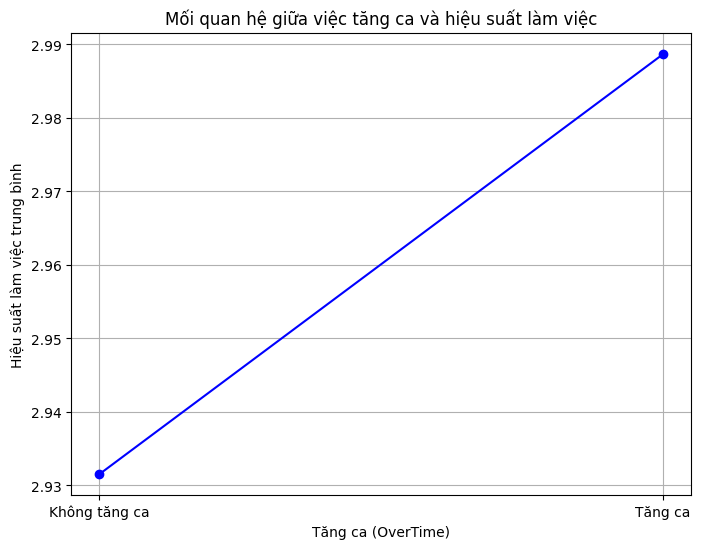

In [ ]:
# Tạo line plot biểu diễn sự tương quan giữa hai biến OverTime và Performance
plt.figure(figsize=(8, 6))

# Tạo hai series dữ liệu dựa trên việc tăng ca và hiệu suất làm việc
overtime = data.groupby('OverTime')['PerformanceRating'].mean()
overtime.plot(marker='o', linestyle='-', color='b')

# Cài đặt các thông số cho biểu đồ
plt.title('Mối quan hệ giữa việc tăng ca và hiệu suất làm việc')
plt.xlabel('Tăng ca (OverTime)')
plt.ylabel('Hiệu suất làm việc trung bình')
plt.xticks([0, 1], ['Không tăng ca', 'Tăng ca'])
plt.grid(True)
plt.show()

Từ biểu đồ trực quan cho thấy biến 'OverTime' và biến 'PerformanceRating' tương quan thuận với nhau (hai biến này có mối quan hệ đồng biến). Biến động của đường biểu diễn không lớn nên có thể kết luận rằng không có các yếu tố khác ảnh hưởng đến mối tương quan giữa tăng ca và hiệu suất làm việc

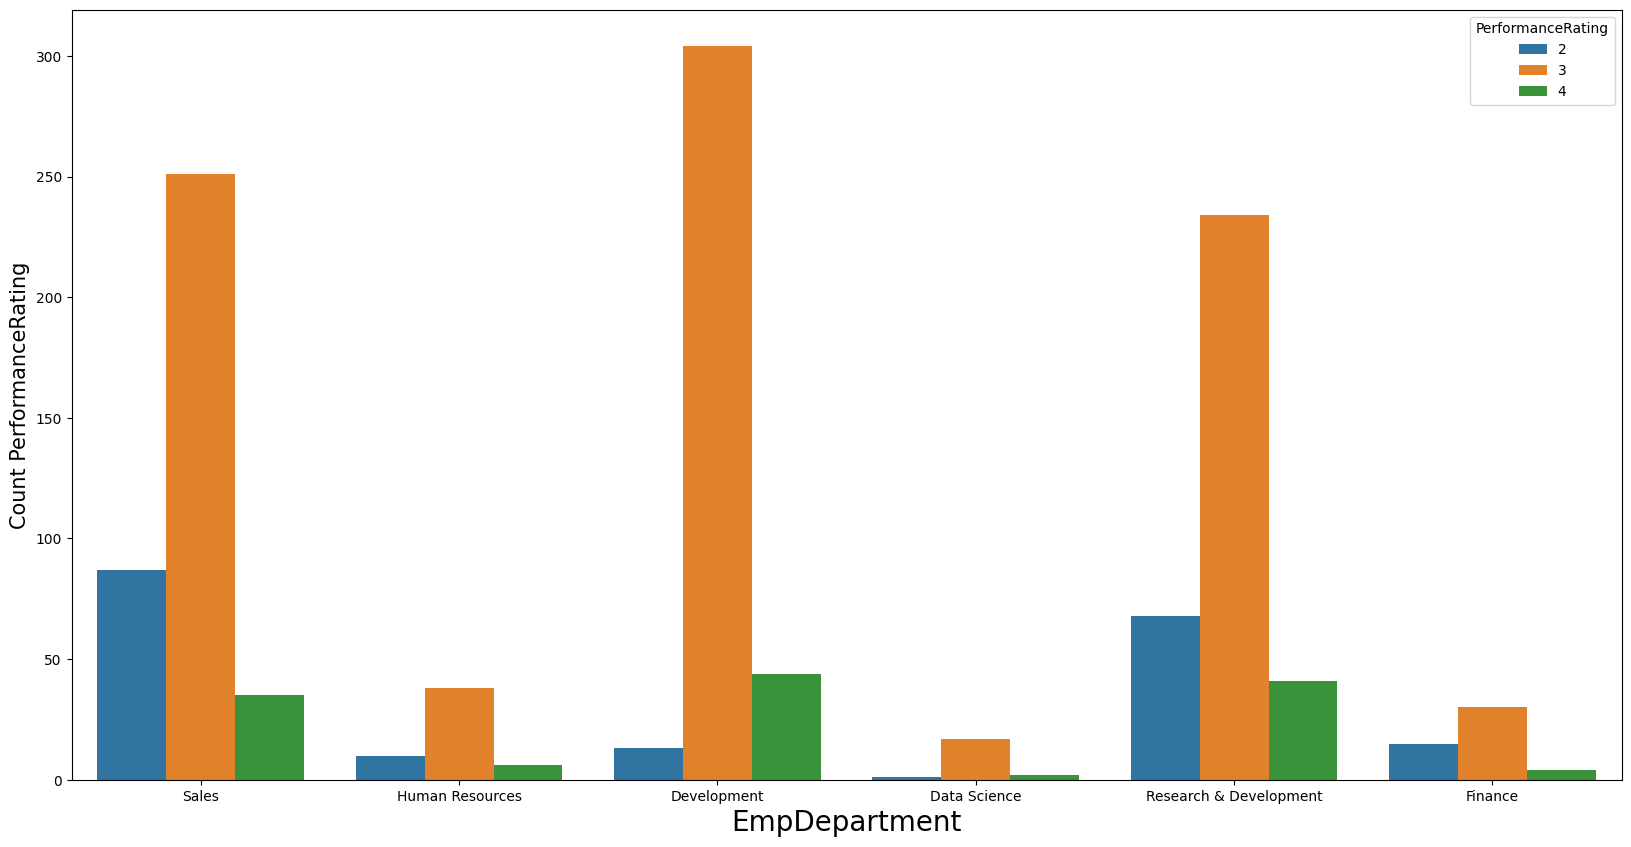

In [ ]:
# Biểu đồ biểu diễn EmpDepartment và Performancerating
plt.figure(figsize=(20,10))
sns.countplot(x='EmpDepartment', hue='PerformanceRating', data=data)
plt.xlabel('EmpDepartment', fontsize=20)
plt.ylabel('Count PerformanceRating', fontsize=15)
plt.show()


In [ ]:
# Kiểm định Chi-square cho hai biến EmpDepartment và PerformaneRating
contingency_table = pd.crosstab(data['EmpDepartment'], data['PerformanceRating'])

# Thực hiện kiểm định chi-square
chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05
confidence_level = 1 - alpha

print(f"Kiểm định chi-square cho biến EmpDepartment và PerformanceRating:")
print(f"  - Giá trị chi-square: {chi2}")
print(f"  - P-value: {p}")
if p < alpha:
    print("  - Có bằng chứng để bác bỏ giả thuyết H0: Hai biến không độc lập.")
else:
    print("  - Không đủ bằng chứng để bác bỏ giả thuyết H0: Hai biến độc lập.")

Kiểm định chi-square cho biến EmpDepartment và PerformanceRating:
  - Giá trị chi-square: 70.32795982136973
  - P-value: 3.832079093105312e-11
  - Có bằng chứng để bác bỏ giả thuyết H0: Hai biến không độc lập.


Kết quả của kiểm định trên cho thấy rằng  cặp biến EmpDepartment (phòng ban nhân viên) và PerformanceRating (đánh giá hiệu suất) có bằng chứng đủ mạnh để bác bỏ giả thuyết H0 ("Hai biến không độc lập"). Có thể tồn tại sự ảnh hưởng của phòng ban làm việc đến hiệu suất làm việc của nhân viên. Có thể cho thấy sự khác biệt trong hiệu suất làm việc giữa các phòng ban khác nhau (được thể hiện qua trực quan biểu đồ cột ở trên).

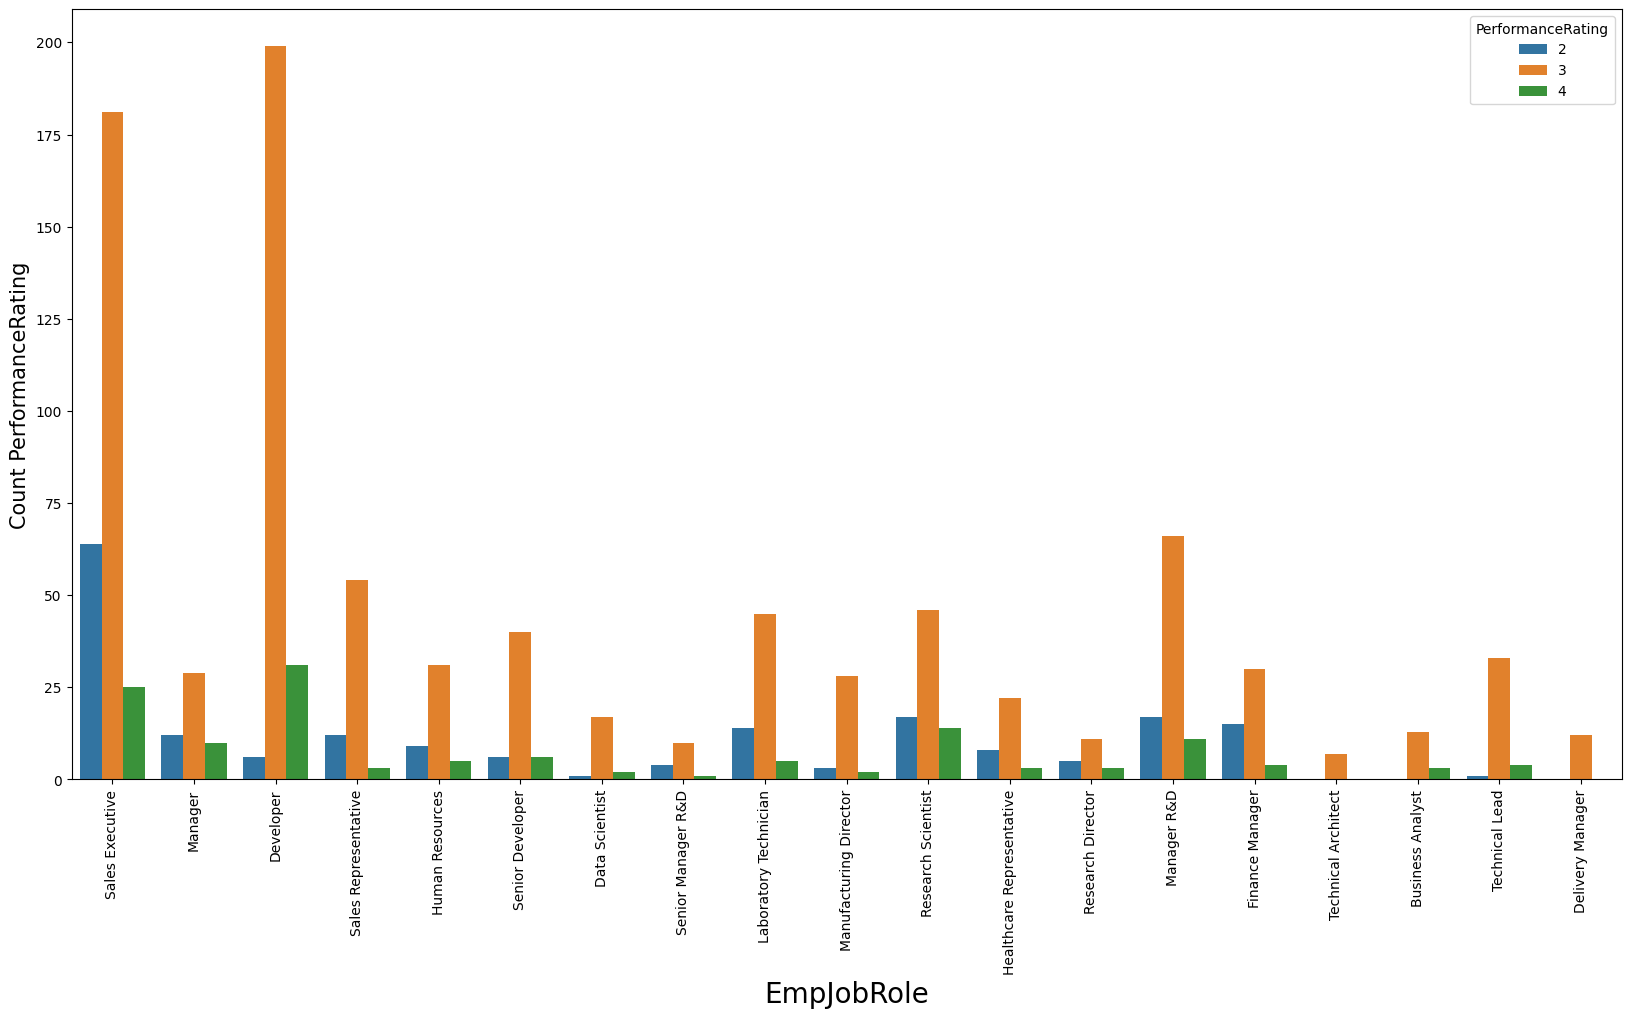

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='EmpJobRole', hue='PerformanceRating', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels to make them more readable
plt.xlabel('EmpJobRole', fontsize=20)
plt.ylabel('Count PerformanceRating', fontsize=15)
plt.show()


In [ ]:
# Kiểm định Chi-square cho hai biến EmpJobRole và PerformanceRating
contingency_table = pd.crosstab(data['EmpJobRole'], data['PerformanceRating'])

# Thực hiện kiểm định chi-square
chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05
confidence_level = 1 - alpha

print(f"Kiểm định chi-square cho biến EmpJobRole và PerformanceRating:")
print(f"  - Giá trị chi-square: {chi2}")
print(f"  - P-value: {p}")
if p < alpha:
    print("  - Có bằng chứng để bác bỏ giả thuyết H0: Hai biến không độc lập.")
else:
    print("  - Không đủ bằng chứng để bác bỏ giả thuyết H0: Hai biến độc lập.")

Kiểm định chi-square cho biến EmpJobRole và PerformanceRating:
  - Giá trị chi-square: 97.74068757227447
  - P-value: 1.3110599924510437e-07
  - Có bằng chứng để bác bỏ giả thuyết H0: Hai biến không độc lập.


Kết quả kiểm định chi-square cho cặp biến EmpJobRole (vị trí công việc) và PerformanceRating (đánh giá hiệu suất) cho thấy giá trị p-value rất nhỏ có bằng chứng đủ mạnh để bác bỏ giả thuyết H0 ("Hai biến không độc lập"). Có mối liên hệ đáng kể giữa vị trí công việc của nhân viên và Hiệu suất làm việc của họ. Có thể có sự khác biệt trong hiệu suất làm việc giữa các vị trí công việc khác nhau. Nghĩa là vị trí công việc của nhân viên có ảnh hưởng đáng kể đến hiệu suất làm việc.

In [ ]:
ordinal_columns = ['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
                   'EmpJobLevel', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction',
                   'EmpWorkLifeBalance']

# Tạo DataFrame từ các cột dữ liệu ordinal được chọn
ordinal_df = data[ordinal_columns]

# Hiển thị DataFrame chứa dữ liệu ordinal
print(ordinal_df)

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpJobInvolvement  \
0                     3                           4                  3   
1                     4                           4                  3   
2                     4                           4                  2   
3                     4                           2                  2   
4                     4                           1                  3   
...                 ...                         ...                ...   
1195                  1                           4                  4   
1196                  2                           4                  4   
1197                  1                           4                  4   
1198                  3                           4                  2   
1199                  2                           1                  3   

      EmpJobLevel  EmpJobSatisfaction  EmpRelationshipSatisfaction  \
0               2                   4    

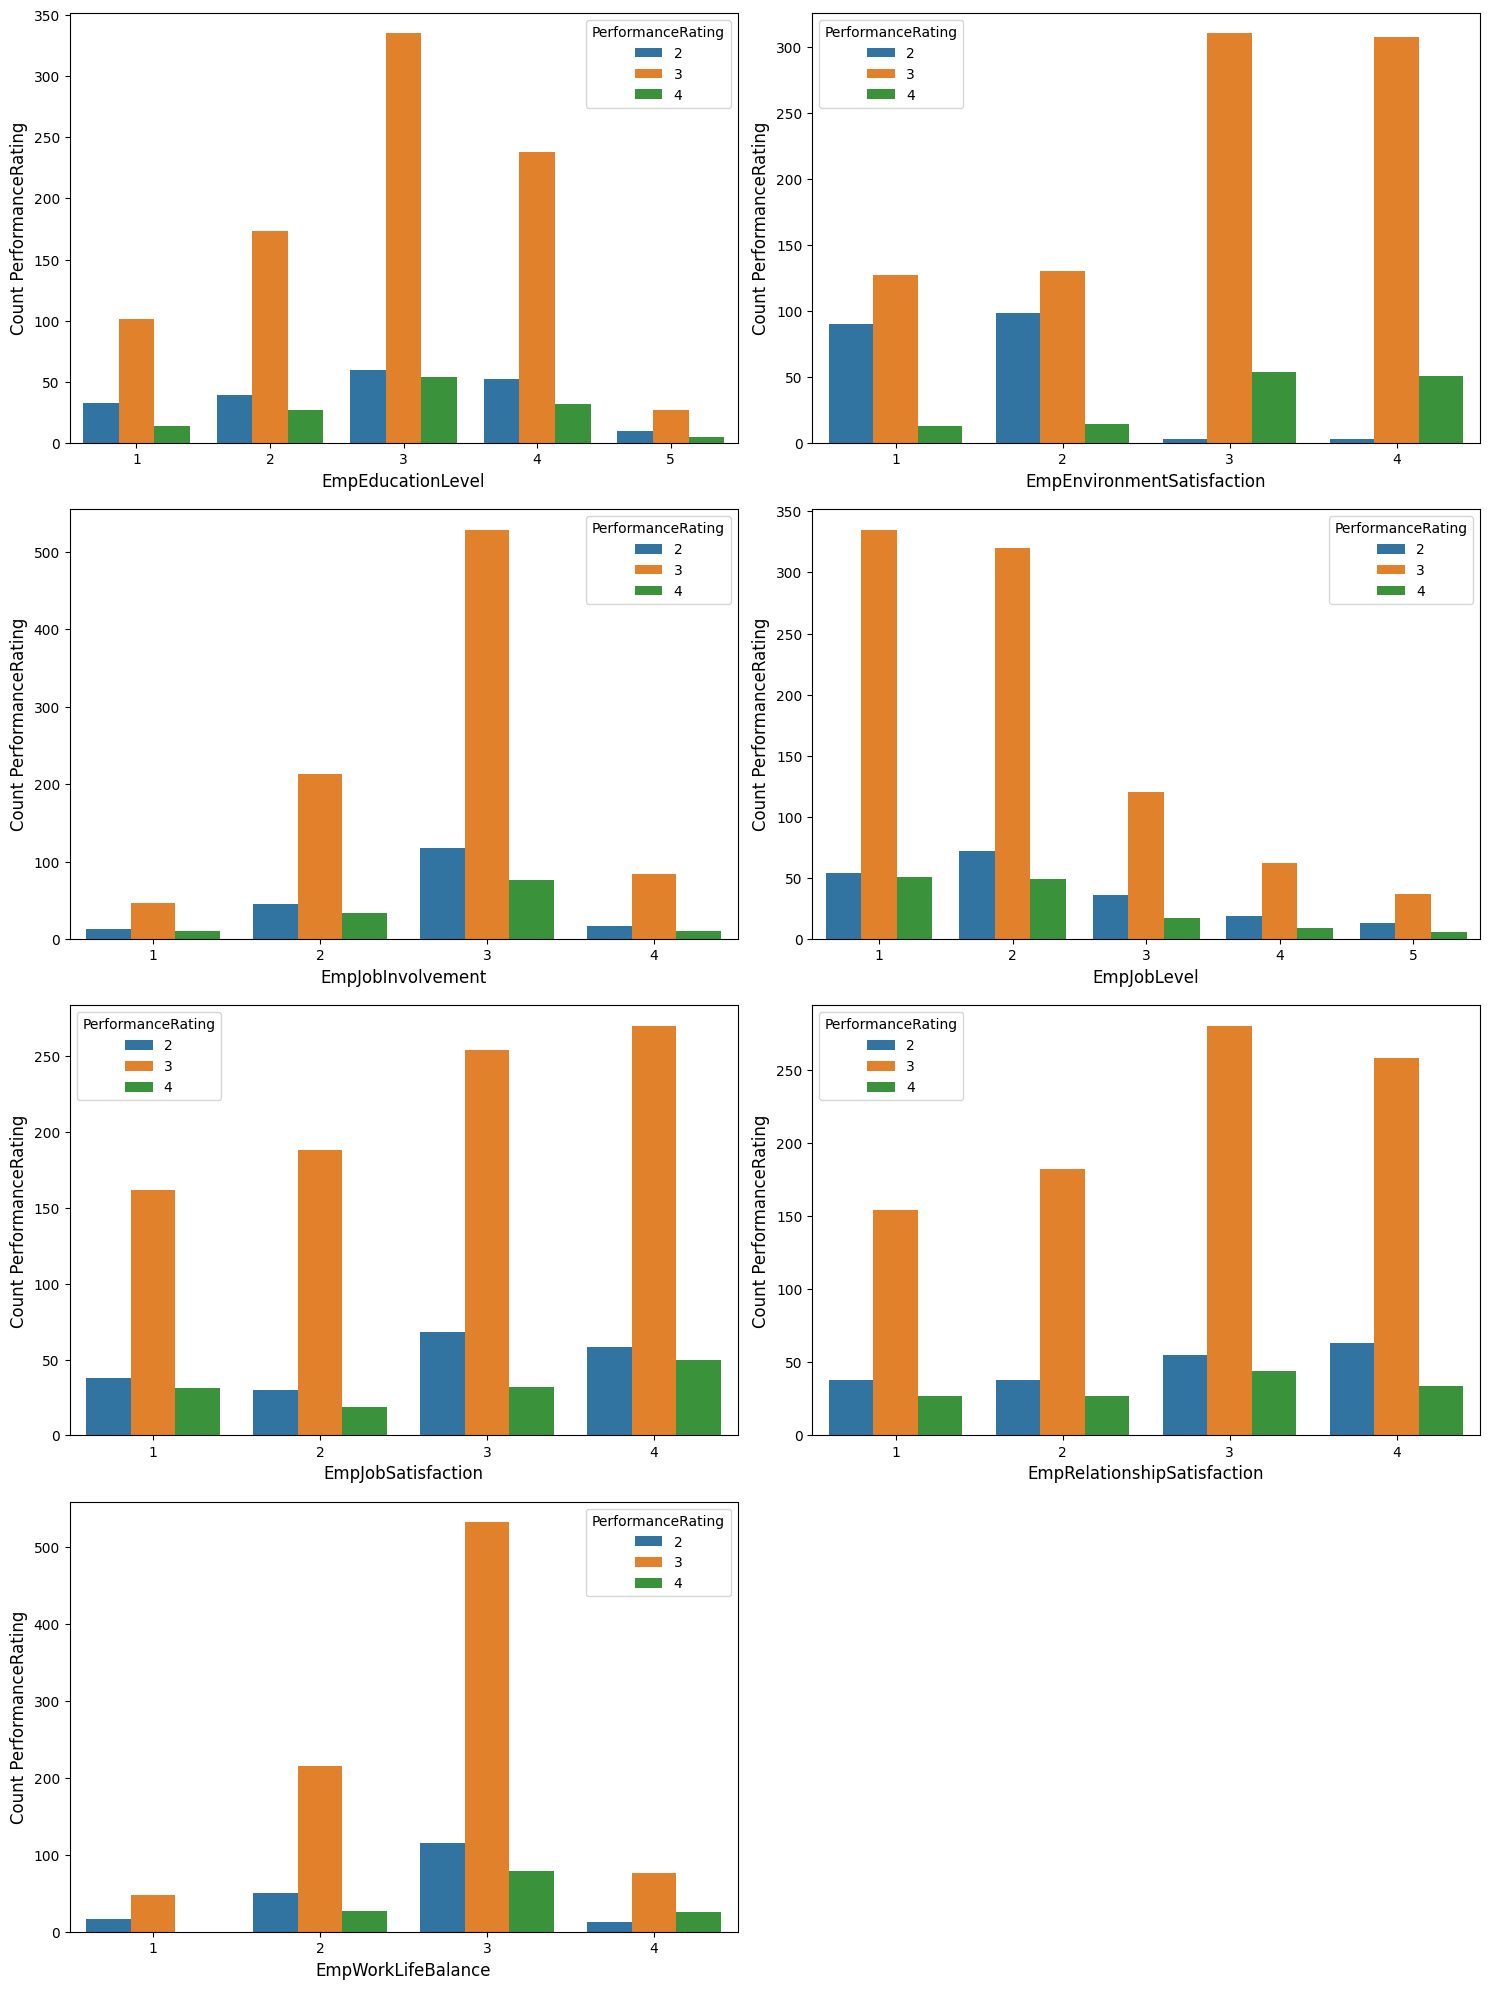

In [ ]:
# Biểu diễn trực quan mối liên hệ giữa các biến ordinal và biến target
ordinal_columns = ['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
                   'EmpJobLevel', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction',
                   'EmpWorkLifeBalance']

plotno = 1
plt.figure(figsize=(15, 20))
for i, column in enumerate(ordinal_columns, start=1):
    plt.subplot(4, 2, i)
    sns.countplot(x=column, hue='PerformanceRating', data=data)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count PerformanceRating', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Kiểm định sự tương quan giữa các biến ordinal và biến target
from scipy.stats import spearmanr
columns_of_interest = ['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel',
                       'EmpJobSatisfaction', 'EmpRelationshipSatisfaction', 'EmpWorkLifeBalance', 'PerformanceRating']
data_subset = data[columns_of_interest]

# Thực hiện kiểm định Spearman's Rank-Order Correlation cho từng cặp biến
alpha = 0.05
for column in columns_of_interest[:-1]:  # Bỏ cột 'PerformanceRating' (biến mục tiêu)
    corr, p_value = spearmanr(data_subset[column], data_subset['PerformanceRating'])

    print(f"Kiểm định tương quan Spearman's Rank-Order Correlation giữa {column} và PerformanceRating:")
    print(f"  - Spearman's correlation coefficient: {corr}")
    print(f"  - P-value: {p_value}")
    if p_value < alpha:
        print("  - Có tương quan đáng kể giữa hai biến.")
    else:
        print("  - Không có đủ bằng chứng để kết luận về tương quan giữa hai biến.")
    print("-------------------------------------------")


Kiểm định tương quan Spearman's Rank-Order Correlation giữa EmpEducationLevel và PerformanceRating:
  - Spearman's correlation coefficient: 0.015318164981300049
  - P-value: 0.59603227561177
  - Không có đủ bằng chứng để kết luận về tương quan giữa hai biến.
-------------------------------------------
Kiểm định tương quan Spearman's Rank-Order Correlation giữa EmpEnvironmentSatisfaction và PerformanceRating:
  - Spearman's correlation coefficient: 0.39660078563644324
  - P-value: 1.7493875307690073e-46
  - Có tương quan đáng kể giữa hai biến.
-------------------------------------------
Kiểm định tương quan Spearman's Rank-Order Correlation giữa EmpJobInvolvement và PerformanceRating:
  - Spearman's correlation coefficient: -0.01068978916069236
  - P-value: 0.7114347904212648
  - Không có đủ bằng chứng để kết luận về tương quan giữa hai biến.
-------------------------------------------
Kiểm định tương quan Spearman's Rank-Order Correlation giữa EmpJobLevel và PerformanceRating:
  - Spea

Dựa trên kiểm định Spearman ở trên ta có thể rút ra một số biến có tương quan đến biến Target PerformanceRating như sau:
- EmpEnvironmentSatisfaction và PerformanceRating có giá trị p-value rất nhỏ chỉ ra sự tương quan mạnh mẽ giữa mức độ hài lòng với môi trường làm việc và hiệu suất làm việc.
- EmpJobLevel và PerformanceRating: Giá trị p-value là 0.005, dưới mức ý nghĩa thông thường. Có sự tương quan đáng kể giữa cấp bậc công việc và hiệu suất làm việc.
- EmpWorkLifeBalance và PerformanceRating: Giá trị p-value rất nhỏ chỉ ra mối tương quan đáng kể giữa cân bằng giữa công việc và cuộc sống cá nhân với hiệu suất làm việc.

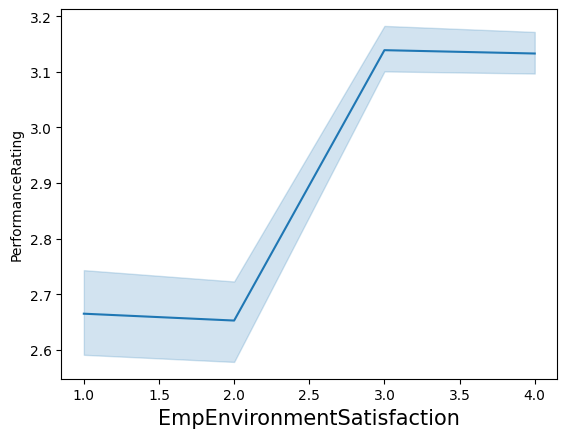

In [ ]:
sns.lineplot(x='EmpEnvironmentSatisfaction',y='PerformanceRating',data=data)
plt.xlabel('EmpEnvironmentSatisfaction',fontsize=15)
plt.show()

Từ biểu đồ lineplot cho thấy rằng EmpEnvironmentSatisfaction và PerformanceRating có sự tương quan thuận với nhau




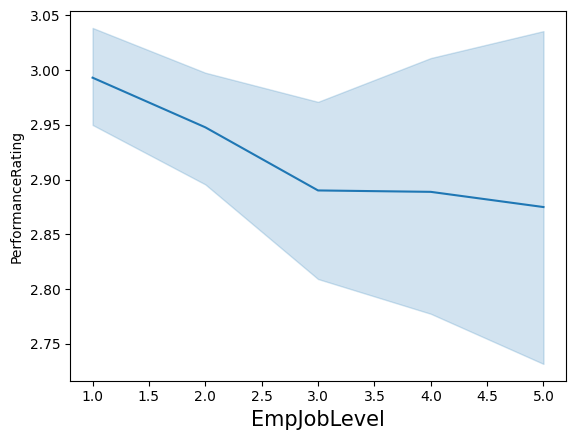

In [ ]:
sns.lineplot(x='EmpJobLevel',y='PerformanceRating',data=data)
plt.xlabel('EmpJobLevel',fontsize=15)
plt.show()

Từ biểu đồ lineplot cho thấy rằng EmpJobLevel và PerformanceRating có sự tương quan thuận với nhau

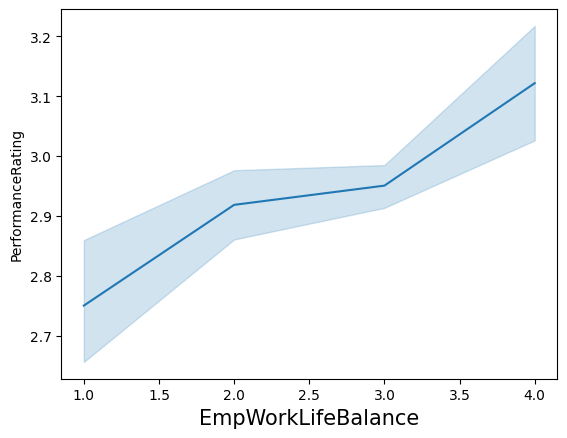

In [ ]:
sns.lineplot(x='EmpWorkLifeBalance',y='PerformanceRating',data=data)
plt.xlabel('EmpWorkLifeBalance',fontsize=15)
plt.show()

Từ biểu đồ lineplot cho thấy rằng EmpWorkLifeBalance và PerformanceRating có sự tương quan thuận với nhau

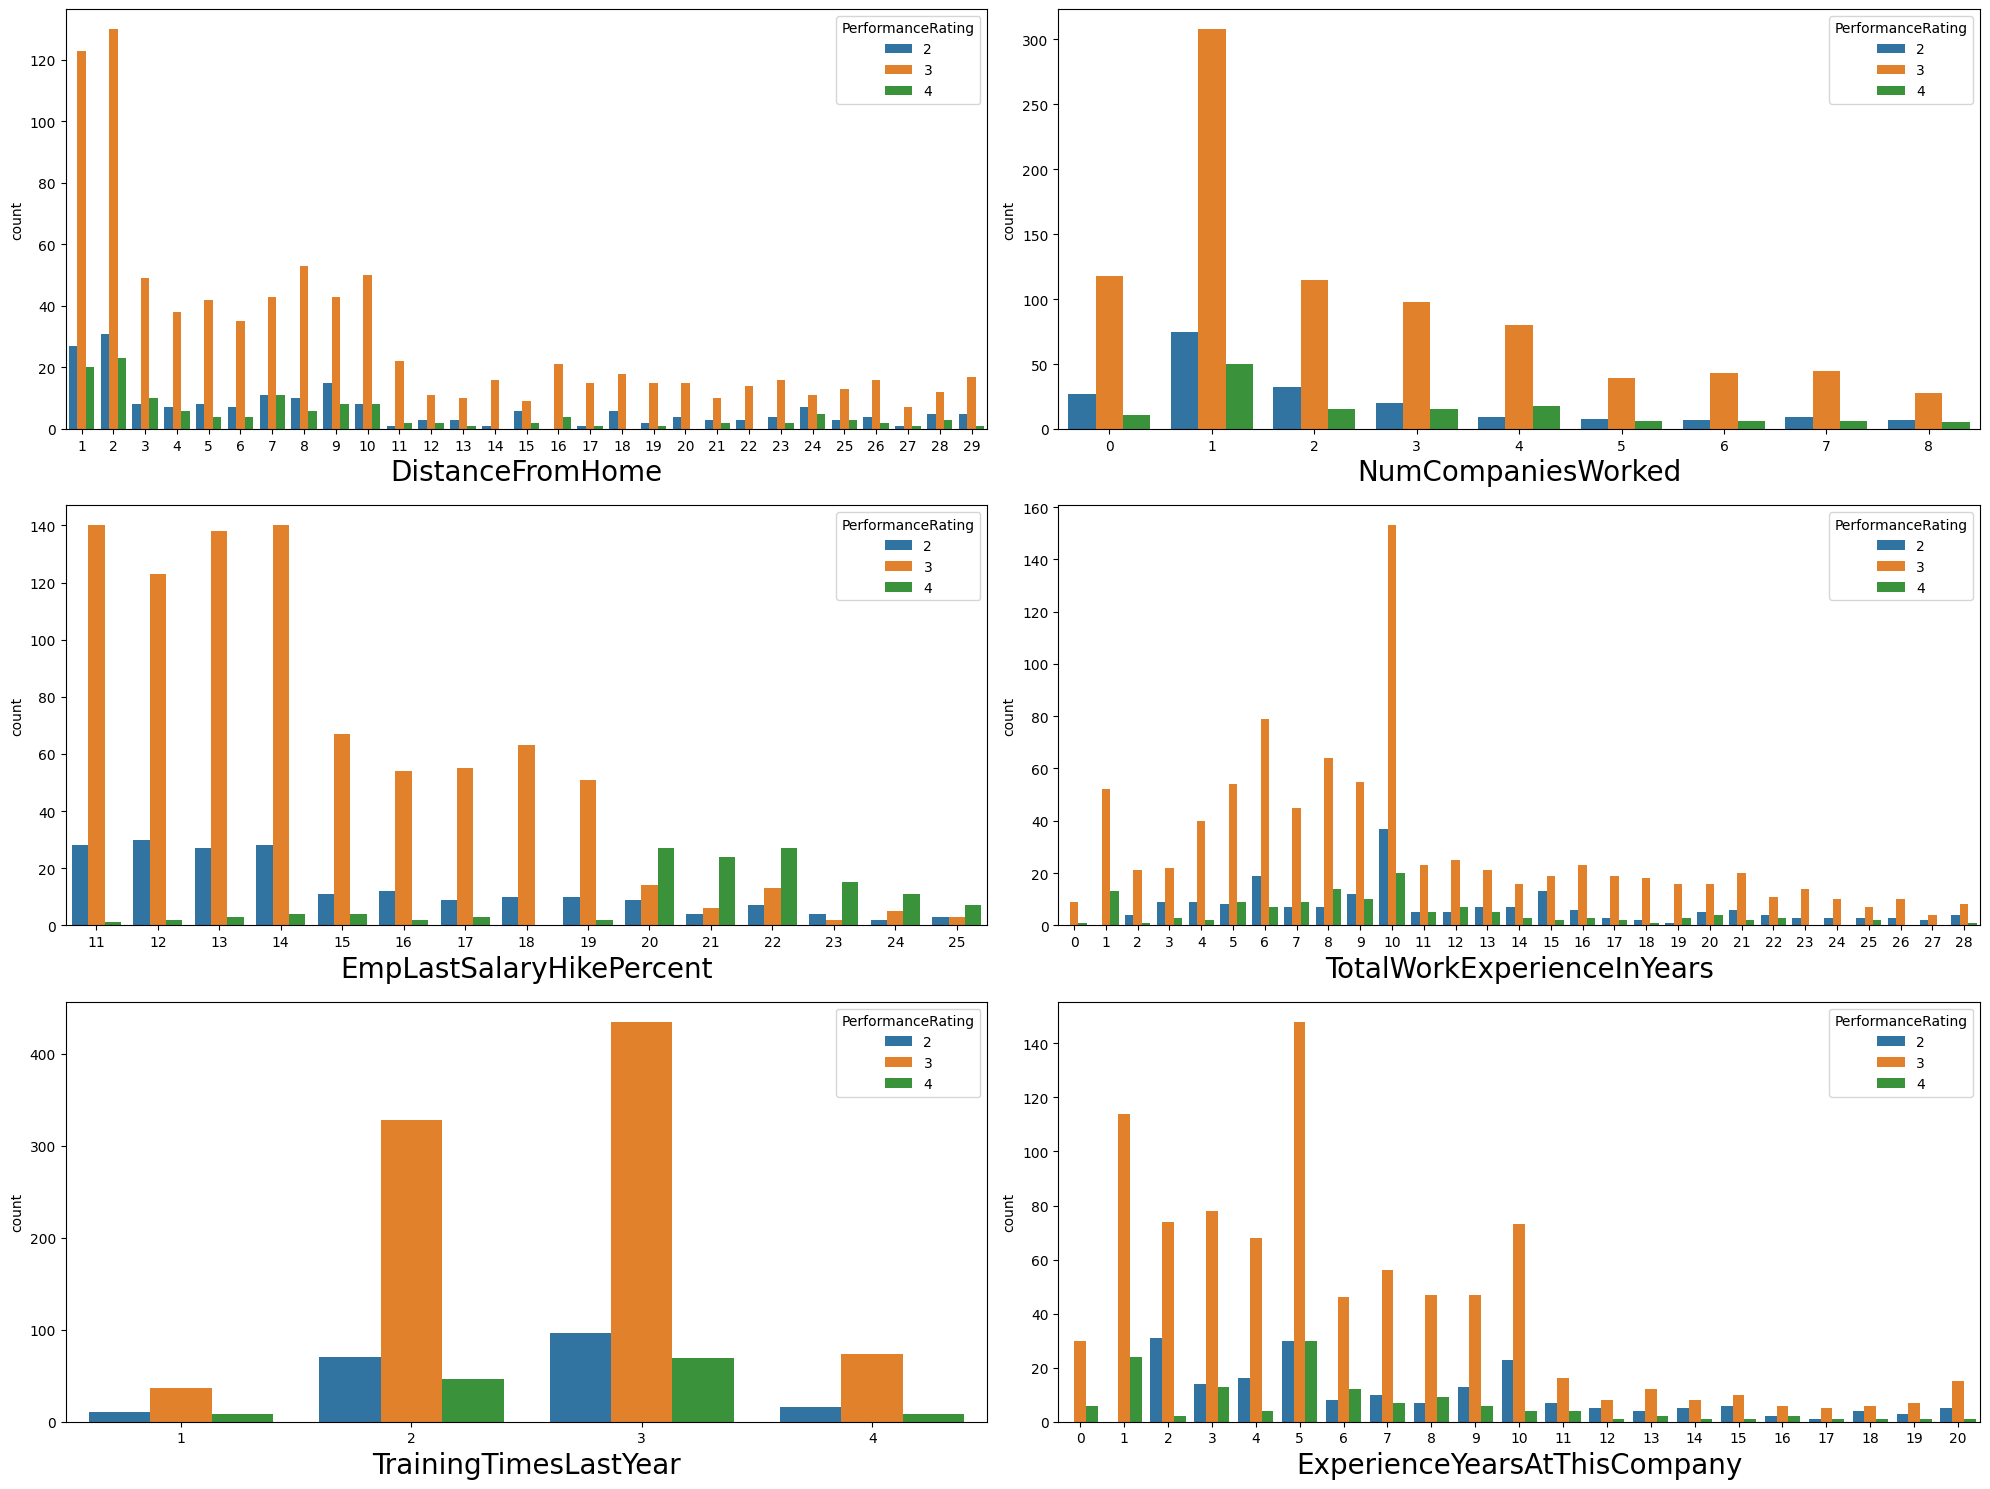

In [ ]:
# Biểu diễn trực quan giữa các biến số và biến target
numerical = data[['DistanceFromHome','NumCompaniesWorked','EmpLastSalaryHikePercent',
                 'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
plotno = 1  # Initialize plot number
plt.figure(figsize=(20, 15))
for column in numerical:
    if plotno <= 6:  # Adjusted to 6 since there are 3 rows and 2 columns
        plt.subplot(3, 2, plotno)
        sns.countplot(x=numerical[column], hue=data.PerformanceRating)
        plt.xlabel(column, fontsize=20)
        plotno += 1  # Increment plot number for each iteration
    else:
        break  # Break the loop if the plot number exceeds 6
plt.tight_layout()  # Adjusts the spacing between plots for better layout
plt.show()

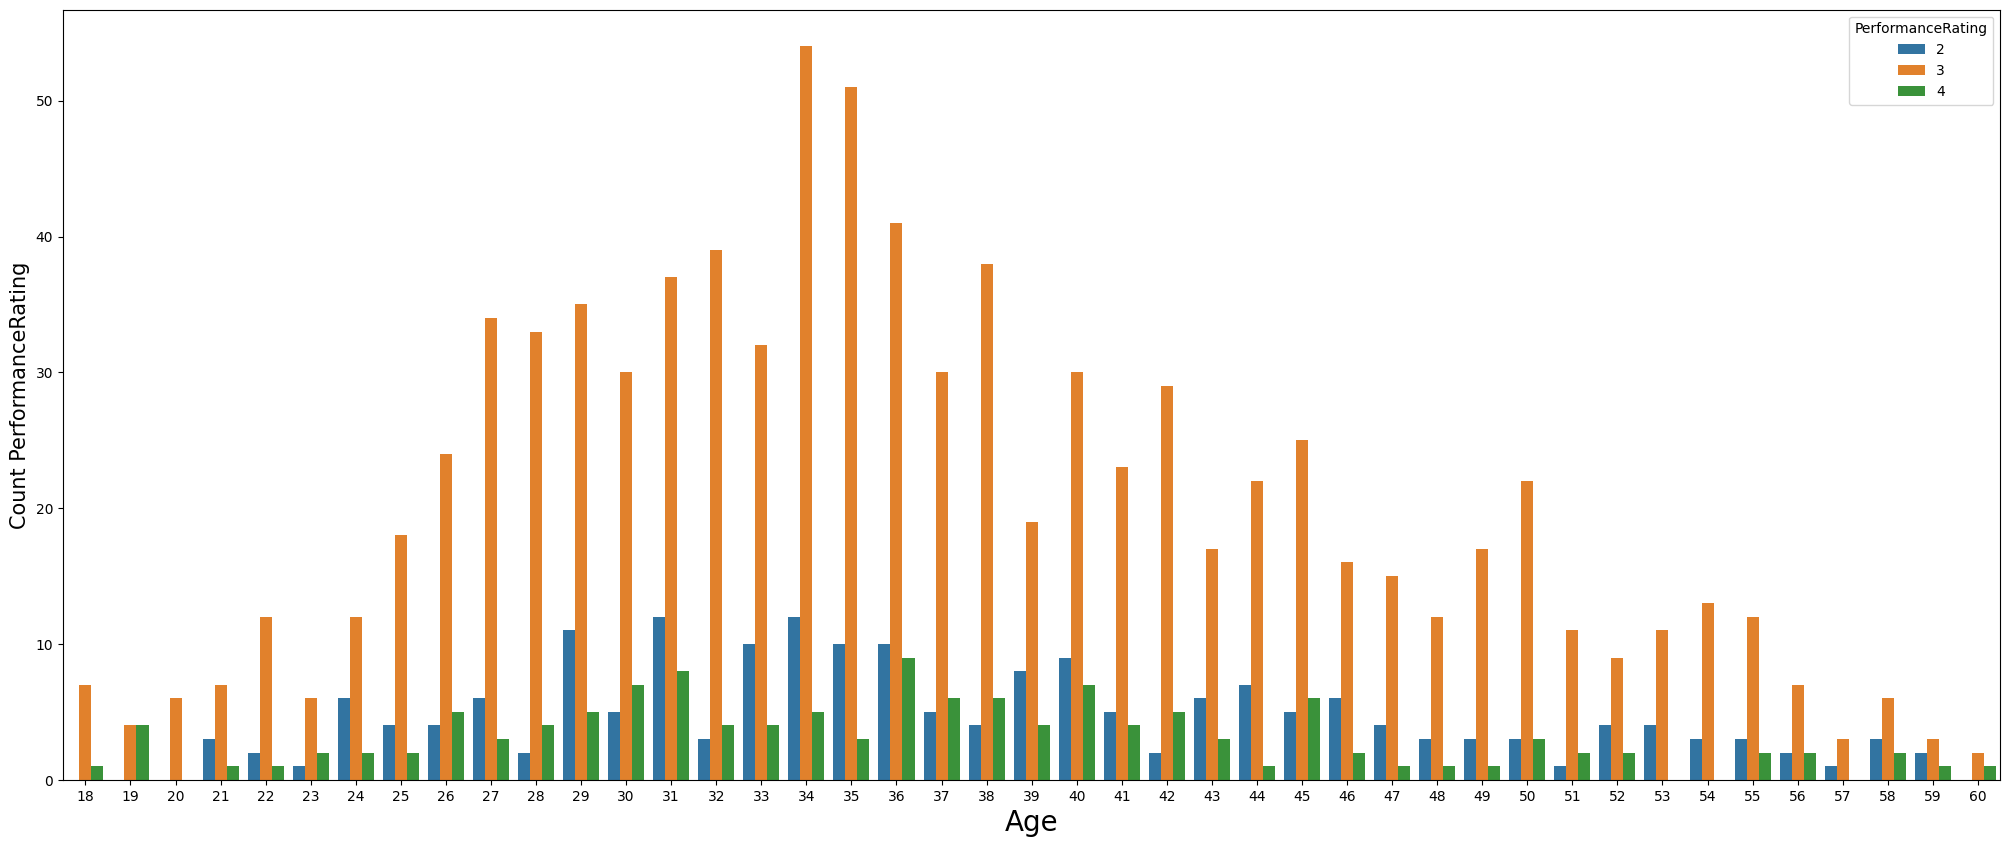

In [ ]:
# Biểu diễn trực quan giữa  biến số Age và biến target
plt.figure(figsize=(25,10))
sns.countplot(x='Age', hue='PerformanceRating', data=data)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count PerformanceRating', fontsize=15)
plt.show()

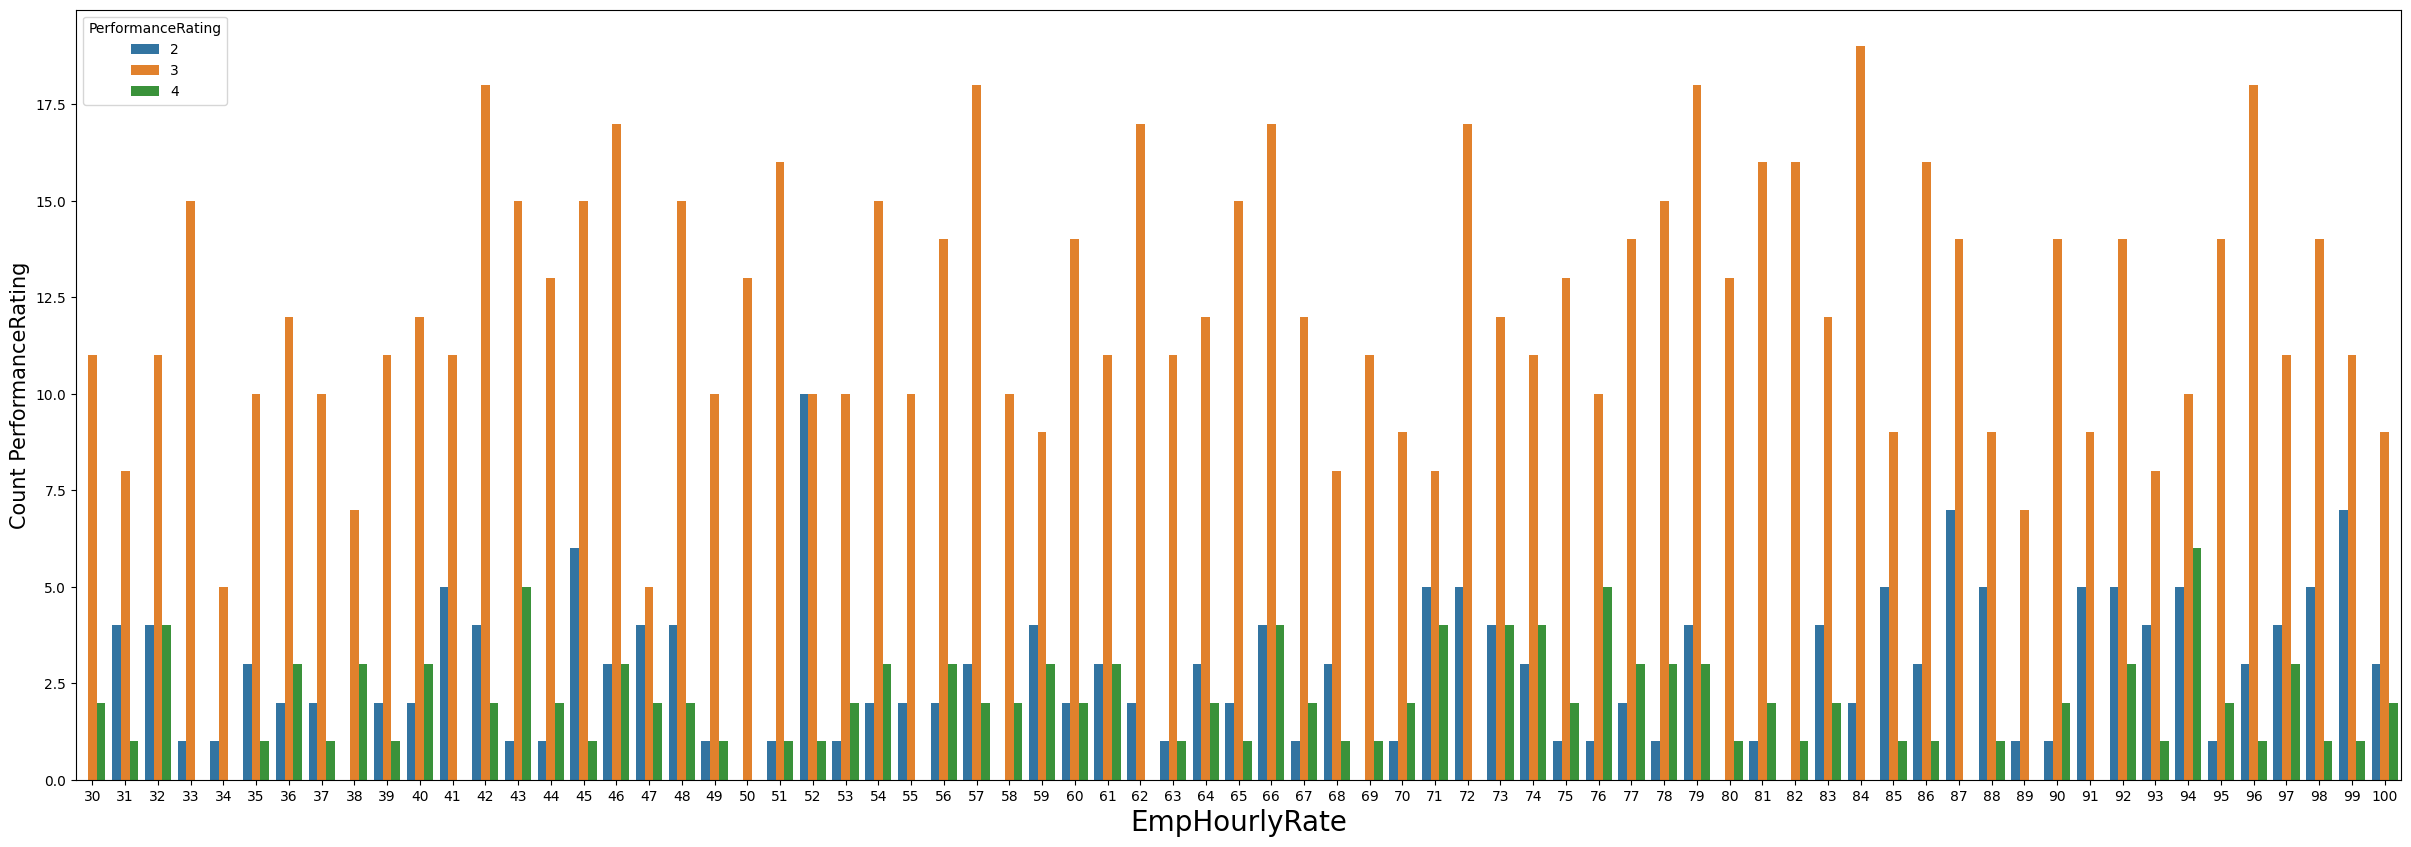

In [ ]:
# Biểu diễn trực quan giữa  biến số EmpHourlyRate và biến target
plt.figure(figsize=(30,10))
sns.countplot(x='EmpHourlyRate', hue='PerformanceRating', data=data)
plt.xlabel('EmpHourlyRate', fontsize=20)
plt.ylabel('Count PerformanceRating', fontsize=15)
plt.show()

In [ ]:
# Xét phân phối chuẩn để chọn loại kiểm định
from scipy.stats import shapiro
for column in numerical:
    stat, p = shapiro(data[column])
    print(f'Biến {column}: statistic={stat:.4f}, p-value={p:.4f}')
    if p > 0.05:
        print(f"Dữ liệu của biến {column} tuân theo phân phối chuẩn")
    else:
        print(f"Dữ liệu của biến {column} không tuân theo phân phối chuẩn")


Biến DistanceFromHome: statistic=0.8570, p-value=0.0000
Dữ liệu của biến DistanceFromHome không tuân theo phân phối chuẩn
Biến NumCompaniesWorked: statistic=0.8518, p-value=0.0000
Dữ liệu của biến NumCompaniesWorked không tuân theo phân phối chuẩn
Biến EmpLastSalaryHikePercent: statistic=0.9042, p-value=0.0000
Dữ liệu của biến EmpLastSalaryHikePercent không tuân theo phân phối chuẩn
Biến TotalWorkExperienceInYears: statistic=0.9359, p-value=0.0000
Dữ liệu của biến TotalWorkExperienceInYears không tuân theo phân phối chuẩn
Biến TrainingTimesLastYear: statistic=0.8283, p-value=0.0000
Dữ liệu của biến TrainingTimesLastYear không tuân theo phân phối chuẩn
Biến ExperienceYearsAtThisCompany: statistic=0.9079, p-value=0.0000
Dữ liệu của biến ExperienceYearsAtThisCompany không tuân theo phân phối chuẩn
Biến ExperienceYearsInCurrentRole: statistic=0.9076, p-value=0.0000
Dữ liệu của biến ExperienceYearsInCurrentRole không tuân theo phân phối chuẩn
Biến YearsSinceLastPromotion: statistic=0.7303, 

In [ ]:
# Vì bộ dữ liệu không tuân theo phân phối chuẩn nên ta chọn kiểm định Kruskal-Wallis Test
from scipy.stats import kruskal

for column in numerical:
    groups = []
    for value in data['PerformanceRating'].unique():
        groups.append(data[data['PerformanceRating'] == value][column])

    # Thực hiện kiểm định Kruskal-Wallis
    stat, p_value = kruskal(*groups)

    # In kết quả
    print(f'Kruskal-Wallis Test cho biến {column} và PerformanceRating:')
    print(f'Chi-squared statistic: {stat}, p-value: {p_value}')
    if p_value < 0.05:  # Kiểm tra mức ý nghĩa thống kê (thường chọn alpha = 0.05)
        print("Có sự khác biệt ý nghĩa giữa các nhóm.")
    else:
        print("Không có sự khác biệt ý nghĩa giữa các nhóm.")
    print('-' * 50)


Kruskal-Wallis Test cho biến DistanceFromHome và PerformanceRating:
Chi-squared statistic: 1.9134972105730839, p-value: 0.38413984796467426
Không có sự khác biệt ý nghĩa giữa các nhóm.
--------------------------------------------------
Kruskal-Wallis Test cho biến NumCompaniesWorked và PerformanceRating:
Chi-squared statistic: 3.147532526920828, p-value: 0.20726310307137816
Không có sự khác biệt ý nghĩa giữa các nhóm.
--------------------------------------------------
Kruskal-Wallis Test cho biến EmpLastSalaryHikePercent và PerformanceRating:
Chi-squared statistic: 235.5897499090232, p-value: 6.955619410693047e-52
Có sự khác biệt ý nghĩa giữa các nhóm.
--------------------------------------------------
Kruskal-Wallis Test cho biến TotalWorkExperienceInYears và PerformanceRating:
Chi-squared statistic: 11.067578402799922, p-value: 0.003950989593683899
Có sự khác biệt ý nghĩa giữa các nhóm.
--------------------------------------------------
Kruskal-Wallis Test cho biến TrainingTimesLastY

Qua kiểm định Kruskal-Wallis ta rút ra được một số biến định lượng có ý nghĩa đến biến target PerformanceRating như sau:
- Biến EmpLastSalaryHikePercent và hiệu suất lao động (PerformanceRating) có mối tương quan đáng kể. Điều này thể hiện rằng những người nhận được mức tăng lương lớn hơn có khả năng có hiệu suất lao động tốt hơn.
- Tăng lương có thể tạo động lực và tác động tích cực đến thái độ làm việc của nhân viên. Tăng lương đáng kể có thể làm tăng cường cam kết và nỗ lực làm việc, dẫn đến hiệu suất lao động tốt hơn.
- Từ đó, có thể tham khảo để xây dựng chính sách lương cho nhân sự nhằm thúc đẩy hiệu suất làm việc của nhân viên.


Khi xét biến số ToltalWorkExperienceInYears và biến target PerformanceRating ta nhận thấy được sự tương quan giữa kinh nghiệm và hiệu suất lao động:
- Mức độ kinh nghiệm làm việc theo năm có mối quan hệ ảnh hưởng đến hiệu suất làm việc của nhân viên. Những người có kinh nghiệm làm việc lâu dài thường có xu hướng có hiệu suất lao động tốt hơn so với những người có kinh nghiệm.
- Người có kinh nghiệm làm việc lâu dài thường tích lũy được nhiều kiến thức chuyên môn và kĩ năng trong lĩnh vực chuyên môn của họ. Điều này có thể ảnh hưởng tích cực đến khả năng thực hiện công việc.
- Sau khi có kết quả thống kê cần có những chính sách cung cấp chính sách và cơ hội để khuyến khích sự phát triển của nhân viên trong công ty.

Mức độ kinh nghiệm làm việc tại công ty (ExperienceYearsAtThisCompany) có mối quan hệ ảnh hưởng đến hiệu suất làm việc của nhân viên (PerformanceRating)
- Tương tự, những người có nhiều kinh nghiệm làm việc tại công ty có hiệu suất lao động tốt hơn những người đang có ít kinh nghiệm
- Những người có kinh nghiệm tại công ty đã quen với môi trường làm việc, có kiến thức sâu về tổ chức và quy trình làm việc. Chính vì vậy mà có tác động đến hiệu suất khi làm việc trong công ty.
- Từ kết luận này, có thể xem xét một số chính sách để thúc đẩy tinh thần làm việc của các nhân sự trong công ty.  

Tương tự với kinh nghiệm làm việc trong công ty và tổng số năm kinh nghiệm thì mức độ kinh nghiệm trong vai trò hiện tại (ExperienceYearsInCurrentRole) có mối quan hệ đáng kể đến hiệu suất lao động (PerformanceRating). Có thể có xu hướng rằng những người có nhiều kinh nghiệm trong vai trò hiện tại có xu hướng có hiệu suất lao động tốt hơn.
- Người có nhiều kinh nghiệm trong vai trò hiện tại thường có độ thành thạo cao và hiểu biết sâu về công việc, quy trình và trách nhiệm của vai trò đó. Điều này có thể ảnh hưởng tích cực đến khả năng thực hiện và hiệu suất làm việc.


Thời gian từ lần thăng tiến gần nhất (YearsSinceLastPromotion) có mối quan hệ đáng kể đến hiệu suất lao động (PerformanceRating). Có thể có xu hướng rằng những người đã trải qua thời gian lâu kể từ lần thăng tiến có hiệu suất lao động thấp hơn so với những người được thăng tiến gần đây hơn.
-  Thời gian lâu kể từ lần thăng tiến có thể ảnh hưởng đến động lực và cam kết của nhân viên. Người không được thăng tiến trong một thời gian dài có thể cảm thấy ít được công nhận và động lực làm việc có thể giảm.

Thời gian làm việc với người quản lý hiện tại (YearsWithCurrManager) có mối quan hệ đáng kể đến hiệu suất lao động (PerformanceRating). Có thể có xu hướng rằng những người đã làm việc lâu với người quản lý hiện tại có hiệu suất lao động tốt hơn so với những người làm việc với người quản lý trong thời gian ngắn.
- Thời gian làm việc lâu dài với người quản lý có thể xây dựng một mối quan hệ tốt giữa nhân viên và người quản lý, điều này có thể ảnh hưởng tích cực đến hiệu suất lao động và sự hỗ trợ trong công việc hàng ngày.
- Kết quả này có thể yêu cầu sự xem xét về vai trò của người quản lý và cách họ hỗ trợ và quản lý nhân viên. Có thể cần xem xét cách thức quản lý quan hệ và hỗ trợ từ người quản lý để tối ưu hóa hiệu suất lao động.

Kết luận: sau khi trực quan và kiểm định thì có những biến sau có tương quan đến biến Target PerformanceRating là:
- Nominal: OverTime, EmpDepartment, EmpJobRole
- Ordinal: EmpEnvironmentSatisfaction, EmpJobLevel, EmpWorkLifeBalance
- Numerical: EmpLastSalaryHikePercent, TotalWorkExperienceInYears, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

# Feature Selection

<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

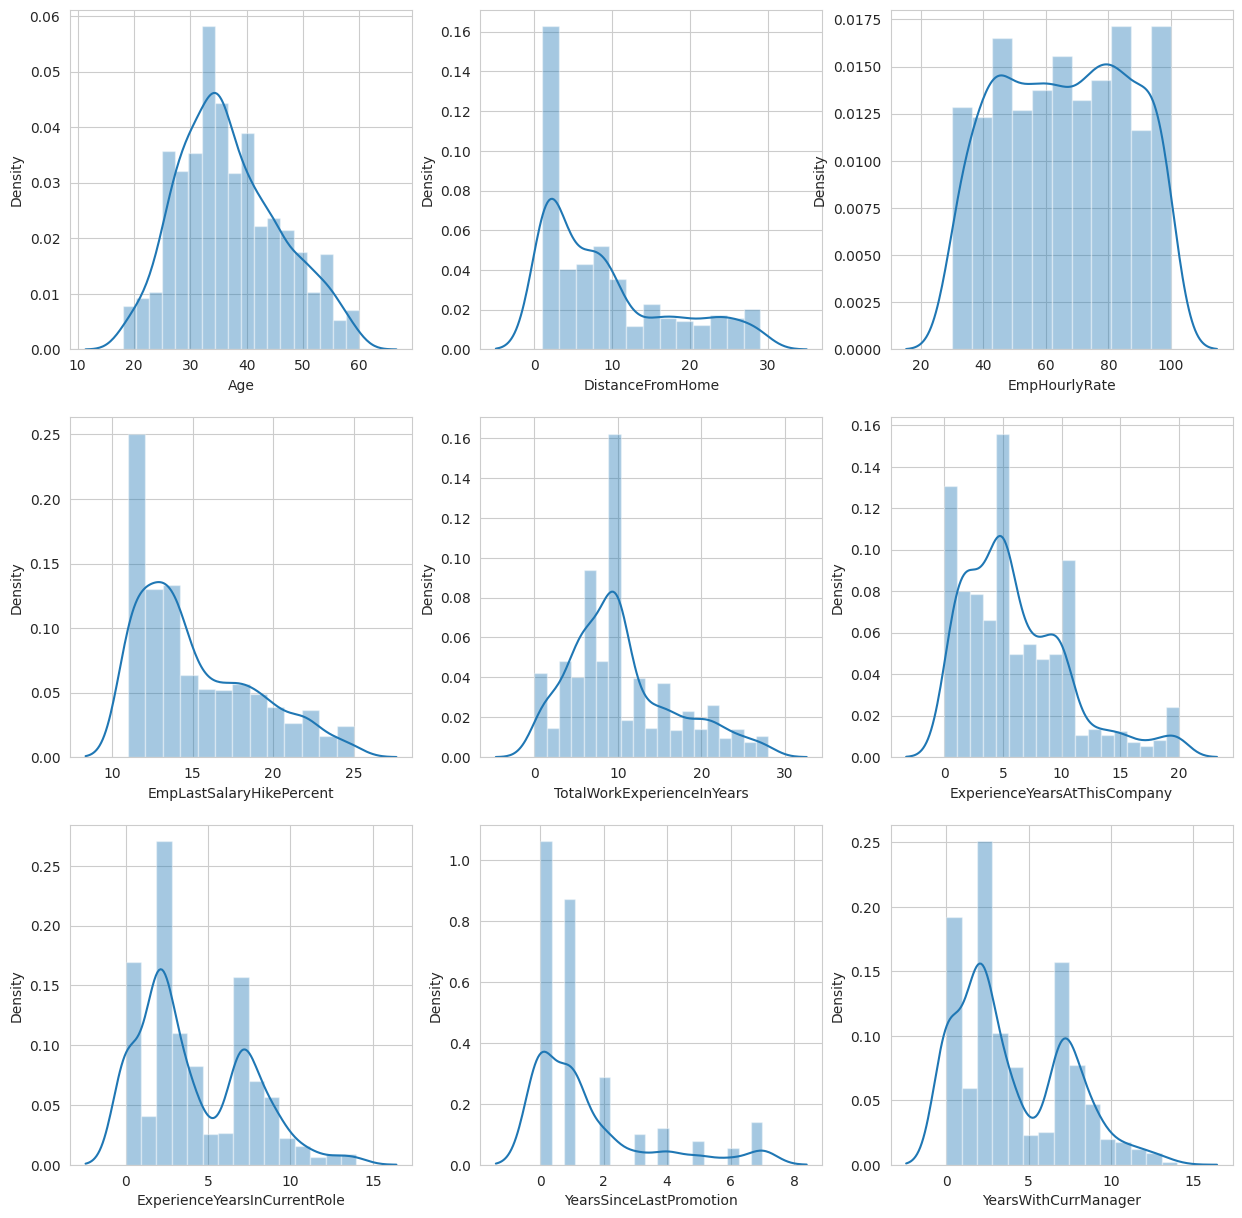

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
sns.distplot(data['Age'], kde = True, hist = True)

plt.subplot(3, 3, 2)
sns.distplot(data['DistanceFromHome'], kde = True, hist = True)

plt.subplot(3, 3, 3)
sns.distplot(data['EmpHourlyRate'], kde = True, hist = True)

plt.subplot(3, 3, 4)
sns.distplot(data['EmpLastSalaryHikePercent'], kde = True, hist = True)

plt.subplot(3, 3, 5)
sns.distplot(data['TotalWorkExperienceInYears'], kde = True, hist = True)

plt.subplot(3, 3, 6)
sns.distplot(data['ExperienceYearsAtThisCompany'], kde = True, hist = True)

plt.subplot(3, 3, 7)
sns.distplot(data['ExperienceYearsInCurrentRole'], kde = True, hist = True)


plt.subplot(3, 3, 8)
sns.distplot(data['YearsSinceLastPromotion'], kde = True, hist = True)

plt.subplot(3, 3, 9)
sns.distplot(data['YearsWithCurrManager'], kde = True, hist = True)



##Convert CATEGORICAL to NUMERICAL

In [ ]:
data[[ 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']].head()

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No


In [ ]:
# Tìm tất cá những kiểu dữ liệu là Categorical
list(data.select_dtypes('object'))

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

###1. Gender

In [ ]:
##đếm số giá trị theo giới tính
data.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [ ]:
#chuyển male thành 1 và female thành 0
data.Gender = data.Gender.map({'Male':1,'Female':0})
# kiểm tra chuyển đổi đã xảy ra hay chưa
data.Gender.value_counts()

1    725
0    475
Name: Gender, dtype: int64

###2. Education Background

In [ ]:
# đếm số giá trị theo Education Background
data.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [ ]:
data.loc[data['EducationBackground']=='Life Sciences','EducationBackground']=5
data.loc[data['EducationBackground']=='Medical','EducationBackground']=4
data.loc[data['EducationBackground']=='Marketing','EducationBackground']=3
data.loc[data['EducationBackground']=='Technical Degree','EducationBackground']=2
data.loc[data['EducationBackground']=='Other','EducationBackground']=1
data.loc[data['EducationBackground']=='Human Resources','EducationBackground']=0

In [ ]:
# kiểm tra chuyển đổi đã xảy ra hay chưa
data.EducationBackground.value_counts()

5    492
4    384
3    137
2    100
1     66
0     21
Name: EducationBackground, dtype: int64

### Marital Status

In [ ]:
#đếm số giá trị theo marital status
data.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [ ]:
data.MaritalStatus = data.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [ ]:
##kiểm tra chuyển đổi đẫ xảy ra hay chưa
data.MaritalStatus.value_counts()

2    548
1    384
0    268
Name: MaritalStatus, dtype: int64

### Employee Department

In [ ]:
# đếm số giá trị theo employee department
data.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [ ]:
data.loc[data['EmpDepartment']=='Sales','EmpDepartment']=5
data.loc[data['EmpDepartment']=='Development','EmpDepartment']=4
data.loc[data['EmpDepartment']=='Research & Development','EmpDepartment']=3
data.loc[data['EmpDepartment']=='Human Resources','EmpDepartment']=2
data.loc[data['EmpDepartment']=='Finance','EmpDepartment']=1
data.loc[data['EmpDepartment']=='Data Science','EmpDepartment']=0

In [ ]:
# kiểm tra chuyển đổi đã xảy ra hay chưa
data.EmpDepartment.value_counts()

5    373
4    361
3    343
2     54
1     49
0     20
Name: EmpDepartment, dtype: int64

###EmpJobRole

In [ ]:
# đếm số giá trị theo EmpJobRole
data.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [ ]:
data.loc[data['EmpJobRole']=='Sales Executive','EmpJobRole']=18
data.loc[data['EmpJobRole']=='Developer','EmpJobRole']=17
data.loc[data['EmpJobRole']=='Manager R&D','EmpJobRole']=16
data.loc[data['EmpJobRole']=='Research Scientist','EmpJobRole']=15
data.loc[data['EmpJobRole']=='Sales Representative','EmpJobRole']=14
data.loc[data['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
data.loc[data['EmpJobRole']=='Senior Developer','EmpJobRole']=12
data.loc[data['EmpJobRole']=='Manager','EmpJobRole']=11
data.loc[data['EmpJobRole']=='Finance Manager','EmpJobRole']=10
data.loc[data['EmpJobRole']=='Human Resources','EmpJobRole']=9
data.loc[data['EmpJobRole']=='Technical Lead','EmpJobRole']=8
data.loc[data['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
data.loc[data['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
data.loc[data['EmpJobRole']=='Data Scientist','EmpJobRole']=5
data.loc[data['EmpJobRole']=='Research Director','EmpJobRole']=4
data.loc[data['EmpJobRole']=='Business Analyst','EmpJobRole']=3
data.loc[data['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
data.loc[data['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
data.loc[data['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [ ]:
# kiểm tra chuyển đổi đã xảy ra hay chưa
data.EmpJobRole.value_counts()

18    270
17    236
16     94
15     77
14     69
13     64
12     52
11     51
10     49
9      45
8      38
7      33
6      33
5      20
4      19
3      16
2      15
1      12
0       7
Name: EmpJobRole, dtype: int64

### Business Travel Frequency

In [ ]:
# đếm số giá trị theo buisness travel frequency
data.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [ ]:
data.BusinessTravelFrequency = data.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,
                                                                 'Non-Travel':0})

In [ ]:
# kiểm tra chuyển đổi đã xảy ra hay chưa
data.BusinessTravelFrequency.value_counts()

2    846
1    222
0    132
Name: BusinessTravelFrequency, dtype: int64

###Overtime

In [ ]:
# đếm số giá trị theo Overtime
data.OverTime.value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [ ]:
data.OverTime = data.OverTime.map({'No':1,'Yes':0})

In [ ]:
# kiểm tra chuyển đổi đã xảy ra hay chưa
data.OverTime.value_counts()

1    847
0    353
Name: OverTime, dtype: int64

### Attrition

In [ ]:
#đếm số giá trị theo Attrition
data.Attrition.value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [ ]:
data.Attrition = data.Attrition.map({'No':1,'Yes':0})

In [ ]:
# kiểm tra chuyển đổi đã xảy ra hay chưa
data.Attrition.value_counts()

1    1022
0     178
Name: Attrition, dtype: int64

In [ ]:
# Kiểm tra lại tất cả các data features
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,1,5,18,2,10,3,4,...,4,10,2,2,10,7,0,8,1,3
1,47,1,3,1,5,18,2,14,4,4,...,4,20,2,3,7,7,1,7,1,3
2,40,1,5,2,5,18,1,5,4,4,...,3,20,2,3,18,13,1,12,1,4
3,41,1,0,0,2,11,2,10,4,2,...,2,23,2,2,5,6,1,6,1,3
4,60,1,3,1,5,18,2,16,4,1,...,4,10,1,3,2,2,2,2,1,3


# **Xây dựng mô hình**

# Principle component analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

Quy ước:
- Biến 1: OverTime
- Biến 2: EmpDepartment
- Biến 3: EmpJobRole
- Biến 4: EmpEnvironmentSatisfaction
- Biến 5: EmpJobLevel
- Biến 6: EmpWorkLifeBalance
- Biến 7: EmpLastSalaryHikePercent
- Biến 8: ToltalWorkExperienceInYears
- Biến 9: ExperienceYearsAtThisCompany
- Biến 10: ExperienceYearsInCurrentRole
- Biến 11: YearsSinceLastPromotion
- Biến 12: YearsWithCurrManager



In [ ]:
features = [ 'OverTime', 'EmpDepartment', 'EmpJobRole', 'EmpEnvironmentSatisfaction', 'EmpJobLevel', 'EmpWorkLifeBalance', 'EmpLastSalaryHikePercent',
            'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

target = 'PerformanceRating'

In [ ]:
X = data[features]
y = data[target]

In [ ]:
# Tạo một MinMaxScaler
scaler = MinMaxScaler()
# Chuẩn hóa dữ liệu sử dụng Min-Max Scaler
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[1.         1.         1.         ... 0.5        0.         0.57142857]
 [1.         1.         1.         ... 0.5        0.14285714 0.5       ]
 [0.         1.         1.         ... 0.92857143 0.14285714 0.85714286]
 ...
 [0.         0.8        0.66666667 ... 0.57142857 0.42857143 0.57142857]
 [1.         0.         0.27777778 ... 0.5        1.         0.5       ]
 [1.         1.         1.         ... 0.14285714 0.28571429 0.        ]]


In [ ]:
# Khởi tạo PCA và fit trên dữ liệu
pca = PCA()
pca.fit(X_scaled)

# Tính tỷ lệ phần trăm variance giải thích được của từng thành phần chính
explained_variance_ratio = pca.explained_variance_ratio_

# Tính tổng tỷ lệ phần trăm variance giải thích được khi lựa chọn từng số lượng thành phần chính
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Tìm số lượng thành phần chính cần thiết để đạt được ngưỡng xác định (ví dụ: 95%)
n_components = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1

print(f"Số lượng thành phần chính cần thiết để giải thích 95% variance: {n_components}")

Số lượng thành phần chính cần thiết để giải thích 95% variance: 10


In [ ]:
# Áp dụng PCA để giảm chiều dữ liệu
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=1)

<Axes: xlabel='PerformanceRating', ylabel='count'>

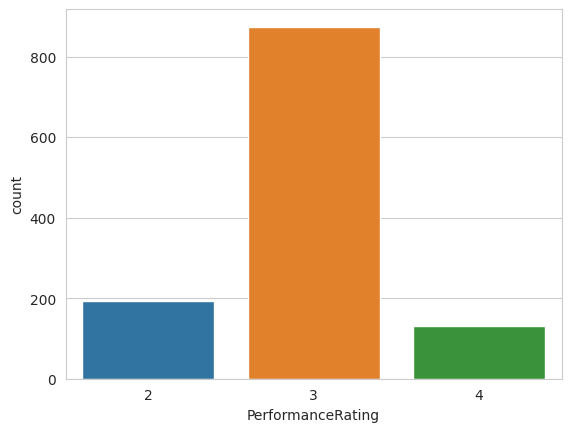

In [ ]:
# Biểu đồ thể hiện số lượng các nhóm trong biến target
sns.countplot (data=data,x=data['PerformanceRating'])

# **Logistic Regression**

In [ ]:
# Khởi tạo mô hình Logistic Regression
logistic_model = LogisticRegression(random_state=42)

# Định nghĩa grid các tham số cần tìm kiếm
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300]
}

# Tạo GridSearchCV với mô hình và grid các tham số
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Huấn luyện mô hình với Grid Search
grid_search.fit(X_train, y_train)

# In ra bộ tham số tốt nhất
print("Bộ tham số tốt nhất:", grid_search.best_params_)

Bộ tham số tốt nhất: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}


In [ ]:
# Hàm ánh xạ các số đánh giá sang chuỗi phân loại
def map_label(value):
    if value == 1:
        return 'Low'
    elif value == 2:
        return 'Good'
    elif value == 3:
        return 'Excellent'
    else:
        return 'Outstanding'

# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
logistic_model = LogisticRegression(C=10, solver='lbfgs', max_iter=100)
logistic_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = logistic_model.predict(X_test)

# Chuyển đổi các số đánh giá thành chuỗi phân loại bằng cách ánh xạ thông qua hàm map_label
y_test_classifications = [map_label(rating) for rating in y_test]
y_pred_classifications = [map_label(rating) for rating in y_pred]

# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test_classifications, y_pred_classifications)
print(f'Độ chính xác của mô hình Logistic Regression: {accuracy*100:.2f}%')

# Tạo báo cáo đánh giá mô hình với các chuỗi phân loại
report = classification_report(y_test_classifications, y_pred_classifications)
print("Báo cáo đánh giá mô hình:\n", report)


Độ chính xác của mô hình Logistic Regression: 78.33%
Báo cáo đánh giá mô hình:
               precision    recall  f1-score   support

   Excellent       0.80      0.93      0.86       170
        Good       0.61      0.34      0.44        41
 Outstanding       0.84      0.55      0.67        29

    accuracy                           0.78       240
   macro avg       0.75      0.61      0.65       240
weighted avg       0.77      0.78      0.76       240



In [ ]:
df_predictions = pd.DataFrame({'Thực tế': y_test, 'Dự đoán': y_pred})
# Tính toán dự đoán chính xác và dự đoán sai của mô hình Logistic Regression
correct_predictions = (df_predictions['Thực tế'] == df_predictions['Dự đoán']).sum()
total_predictions = len(df_predictions)
incorrect_predictions = total_predictions - correct_predictions

# Hiển thị số dự đoán
print(f'Tổng số dự đoán: {total_predictions}')
print(f'Tổng số dự đoán đúng: {correct_predictions}')
print(f'Tổng số dự đoán sai: {incorrect_predictions}')

Tổng số dự đoán: 240
Tổng số dự đoán đúng: 188
Tổng số dự đoán sai: 52


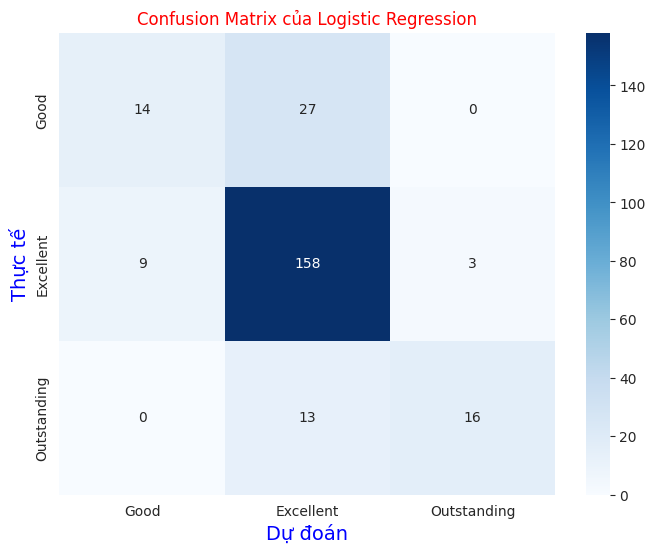

In [ ]:
from sklearn.metrics import confusion_matrix
# Tạo confusion matrix
conf_matrix = confusion_matrix(y_test_classifications, y_pred_classifications,
                               labels=[ 'Good', 'Excellent', 'Outstanding'])

# Hiển thị confusion matrix dưới dạng heatmap với nhãn
plt.figure(figsize=(8, 6))
heatmap= sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[ 'Good', 'Excellent', 'Outstanding'],
            yticklabels=[ 'Good', 'Excellent', 'Outstanding'])
heatmap.set_xlabel('Dự đoán', color='blue', fontsize=14)
heatmap.set_ylabel('Thực tế', color='blue', fontsize=14)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix của Logistic Regression', color='red')
plt.show()


# **Mô hình cây quyết định**

In [ ]:
# Khởi tạo mô hình Decision Tree
decision_tree = DecisionTreeClassifier()

# Thiết lập các giá trị để thử nghiệm
param_grid = {
    'max_depth': [3, 5, 7, 9, None],  # Các giá trị max_depth để thử nghiệm
    'random_state': [1, 42, 100]  # Các giá trị random_state để thử nghiệm
}

# Tìm kiếm siêu tham số tốt nhất
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra bộ tham số tốt nhất
print("Bộ tham số tối ưu:", grid_search.best_params_)


Bộ tham số tối ưu: {'max_depth': 3, 'random_state': 1}


In [ ]:
# Hàm ánh xạ các số đánh giá sang chuỗi phân loại
def map_label(value):
    if value == 1:
        return 'Low'
    elif value == 2:
        return 'Good'
    elif value == 3:
        return 'Excellent'
    else:
        return 'Outstanding'

# Khởi tạo và huấn luyện mô hình Decision Tree với các tham số tối ưu cố định
decision_tree_model = DecisionTreeClassifier(max_depth=3, random_state=1)
decision_tree_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Chuyển đổi các số đánh giá thành chuỗi phân loại bằng cách ánh xạ thông qua hàm map_label
y_test_tree = [map_label(rating) for rating in y_test]
y_pred_tree = [map_label(rating) for rating in y_pred_decision_tree]

# Đánh giá hiệu suất của mô hình với các chuỗi phân loại
accuracy = accuracy_score(y_test_tree, y_pred_tree)
print(f'Độ chính xác của mô hình Decision Tree: {accuracy*100:.2f}%')

# Tạo báo cáo đánh giá mô hình với các chuỗi phân loại
report = classification_report(y_test_tree, y_pred_tree)
print("Báo cáo đánh giá mô hình:\n", report)

Độ chính xác của mô hình Decision Tree: 80.00%
Báo cáo đánh giá mô hình:
               precision    recall  f1-score   support

   Excellent       0.82      0.92      0.87       170
        Good       0.59      0.41      0.49        41
 Outstanding       0.90      0.66      0.76        29

    accuracy                           0.80       240
   macro avg       0.77      0.66      0.70       240
weighted avg       0.79      0.80      0.79       240



In [ ]:
feature_importance = decision_tree_model.feature_importances_
top_three_indices = feature_importance.argsort()[-3:][::-1]
print("Ba biến có mức độ quan trọng cao nhất đối với biến mục tiêu:")
for i in top_three_indices:
    print(f"Biến {i + 1}: {feature_importance[i]}")
n_features = len(feature_importance)
feature_names = [f"Biến {i+1}" for i in range(n_features)]


Ba biến có mức độ quan trọng cao nhất đối với biến mục tiêu:
Biến 3: 0.38690395860411814
Biến 6: 0.3757001123523493
Biến 2: 0.15983749167339503


# **Mô hình rừng ngẫu nhiên**

In [ ]:
# Khởi tạo mô hình Random Forest
random_forest = RandomForestClassifier()

# Thiết lập các giá trị để thử nghiệm
param_grid = {
    'n_estimators': [50, 100, 150],  # Các giá trị n_estimators để thử nghiệm
    'max_depth': [5, 10, 15],  # Các giá trị max_depth để thử nghiệm
    'random_state': [42, 100, 2023]  # Các giá trị random_state để thử nghiệm
}

# Tìm kiếm siêu tham số tốt nhất
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra bộ tham số tốt nhất
print("Bộ tham số tối ưu:", grid_search.best_params_)

Bộ tham số tối ưu: {'max_depth': 10, 'n_estimators': 150, 'random_state': 42}


In [ ]:
# Hàm ánh xạ các số đánh giá sang chuỗi phân loại
def map_label(value):
    if value == 1:
        return 'Low'
    elif value == 2:
        return 'Good'
    elif value == 3:
        return 'Excellent'
    else:
        return 'Outstanding'

# Khởi tạo và huấn luyện mô hình Random Forest với các tham số tối ưu cố định
random_forest_model = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
random_forest_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_random_forest = random_forest_model.predict(X_test)

# Chuyển đổi các số đánh giá thành chuỗi phân loại bằng cách ánh xạ thông qua hàm map_label
y_test_random_forest = [map_label(rating) for rating in y_test]
y_pred_random_forest = [map_label(rating) for rating in y_pred_random_forest]

# Đánh giá hiệu suất của mô hình
accuracy = accuracy_score(y_test_random_forest, y_pred_random_forest)
print(f'Độ chính xác của mô hình Random Forest: {accuracy*100:.2f}%')

report = classification_report(y_test_random_forest, y_pred_random_forest)
print("Báo cáo đánh giá mô hình:\n", report)

Độ chính xác của mô hình Random Forest: 82.50%
Báo cáo đánh giá mô hình:
               precision    recall  f1-score   support

   Excellent       0.85      0.92      0.88       170
        Good       0.63      0.46      0.54        41
 Outstanding       0.88      0.76      0.81        29

    accuracy                           0.82       240
   macro avg       0.79      0.72      0.74       240
weighted avg       0.82      0.82      0.82       240



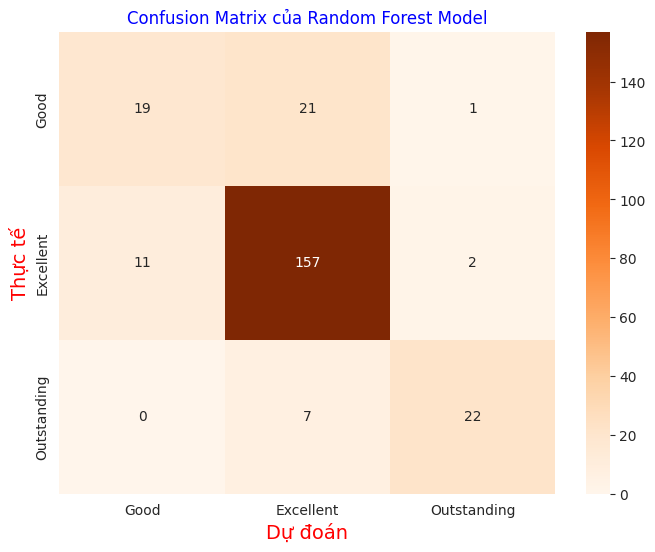

In [ ]:
# Tạo confusion matrix
confran_matrix = confusion_matrix(y_test_random_forest, y_pred_random_forest,
                               labels=[ 'Good', 'Excellent', 'Outstanding'])

# Hiển thị confusion matrix dưới dạng heatmap với nhãn
plt.figure(figsize=(8, 6))
heatmap= sns.heatmap(confran_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=[ 'Good', 'Excellent', 'Outstanding'],
            yticklabels=[ 'Good', 'Excellent', 'Outstanding'])
heatmap.set_xlabel('Dự đoán', color='red', fontsize=14)
heatmap.set_ylabel('Thực tế', color='red', fontsize=14)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix của Random Forest Model', color='blue')
plt.show()

# **Sử dụng phương pháp kiểm định chéo (cross-validation) để kiểm định ba mô hình trên**

In [ ]:
# Khởi tạo các mô hình
logistic_model = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Thực hiện kiểm định chéo với các thông số đánh giá biến phân loại
logistic_scores = cross_val_score(logistic_model, X_pca, y, cv=5, scoring='accuracy')
tree_scores = cross_val_score(decision_tree, X_pca, y, cv=5, scoring='accuracy')
forest_scores = cross_val_score(random_forest, X_pca, y, cv=5, scoring='accuracy')

# In ra kết quả kiểm định chéo với các thông số đánh giá biến phân loại cho từng mô hình
print(f"Điểm số kiểm định chéo Logistic Regression: {logistic_scores.mean()*100:.2f}%")
print(f"Điểm số kiểm định chéo Decision Tree: {tree_scores.mean()*100:.2f}%")
print(f"Điểm số kiểm định chéo Random Forest: {forest_scores.mean()*100:.2f}%")

Điểm số kiểm định chéo Logistic Regression: 79.25%
Điểm số kiểm định chéo Decision Tree: 80.08%
Điểm số kiểm định chéo Random Forest: 83.75%


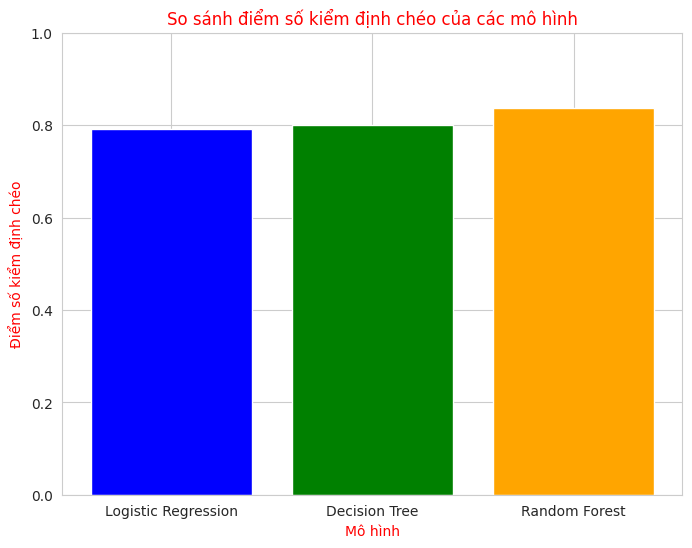

In [ ]:
# Điểm số kiểm định chéo của các mô hình
model_scores = [logistic_scores.mean(), tree_scores.mean(), forest_scores.mean()]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.bar(model_names, model_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Mô hình',color='red')
plt.ylabel('Điểm số kiểm định chéo',color='red')
plt.title('So sánh điểm số kiểm định chéo của các mô hình', color='red')
plt.ylim(0, 1)
plt.show()

Từ các kết quả trên ta có thể thấy rằng mô hình Random Forest có điểm số cao nhất trong số ba mô hình đã được đánh giá, với độ chính xác trung bình ở mức 83.75%. Điều này cho thấy rằng mô hình Random Forest có xu hướng dự đoán chính xác hơn trên tập dữ liệu chưa từng được sử dụng trong quá trình huấn luyện so với hai mô hình còn lại.

Dựa trên độ chính xác trung bình từ quá trình kiểm định chéo, ta có thể kết luận rằng mô hình Random Forest có hiệu suất tốt nhất trong số ba mô hình này đối với tập dữ liệu.